DATA COLLECTION

In [89]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import std

In [93]:
# LOADING THE DATASET

df = pd.read_excel('HealthCareData .xlsx')
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [261]:
# ROWS & COLUMNS IN THE DATASET

rows, columns = df.shape

print(f'Total number of rows: {rows}')
print(f'Total number of columns: {columns}')

Total number of rows: 949
Total number of columns: 32


In [262]:
df.describe()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Diabetes Result,Blood pressure (mmhg),Obesity,Family history of cirrhosis/ hereditary,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),USG Abdomen (diffuse liver or not),Outcome
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,9.490000e+02,949.000000,9.490000e+02,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,50.614331,0.789252,1.380400,20.597998,2.202845,2.199157,0.681770,22.553214,0.578504,1.057956,10.271844,33.935195,3.390704e+00,87.509866,3.052740e+01,3.190108e+01,8162.135170,66.908325,26.028451,3.641504,2.273388,0.482223,1.451359,3.725659,2.424199,5.592002,2.551711,3.217130,132.556633,80.483667,0.041096,0.021075
std,8.758139,0.420782,0.487908,7.975297,0.822419,0.878337,0.466035,13.140934,0.494059,0.282791,1.884847,5.292906,4.043343e-14,13.424783,3.341312e-13,6.327165e-13,2162.874788,6.355023,7.231512,2.696275,1.413030,0.628022,0.393756,1.588714,0.934256,1.259983,0.870616,0.995641,27.313883,26.947812,0.198617,0.143710
min,32.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.250000,20.500000,3.390704e+00,60.000000,3.052740e+01,3.190108e+01,3100.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.520000,0.800000,0.500000,2.900000,0.900000,1.000000,56.000000,32.000000,0.000000,0.000000
25%,44.000000,1.000000,1.000000,15.000000,2.000000,1.000000,0.000000,9.000000,0.000000,1.000000,9.000000,31.000000,3.390704e+00,78.000000,3.052740e+01,3.190108e+01,7000.000000,61.000000,22.000000,2.000000,1.000000,0.000000,1.200000,2.700000,2.000000,5.000000,2.000000,2.500000,110.000000,59.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,20.000000,2.000000,3.000000,1.000000,25.000000,1.000000,1.000000,10.000000,35.000000,3.390704e+00,87.000000,3.052740e+01,3.190108e+01,7500.000000,65.000000,27.000000,3.000000,2.000000,0.000000,1.420000,3.700000,2.400000,6.000000,2.500000,3.100000,130.000000,74.000000,0.000000,0.000000
75%,57.000000,1.000000,2.000000,26.000000,3.000000,3.000000,1.000000,33.000000,1.000000,1.000000,11.500000,38.000000,3.390704e+00,94.000000,3.052740e+01,3.190108e+01,9600.000000,72.000000,32.000000,5.000000,3.000000,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,0.000000,0.000000
max,76.500000,2.000000,2.000000,42.500000,4.500000,3.000000,1.000000,48.000000,1.000000,2.000000,15.250000,48.000000,3.390704e+00,118.000000,3.052740e+01,3.190108e+01,13000.000000,81.000000,44.000000,9.500000,6.000000,2.500000,2.450000,6.450000,4.500000,8.300000,4.500000,6.250000,206.000000,151.500000,1.000000,1.000000


DATA PREPROCESSING

In [94]:
df['Diabetes Result'].unique()

array(['YES', 'NO'], dtype=object)

In [95]:
df['Gender'].value_counts()

,count
Gender,
male,739
female,195
female,11
transgender,5


In [96]:
df['Gender'] = df['Gender'].replace('female ','female')

In [97]:
df['Gender'].value_counts()

,count
Gender,
male,739
female,206
transgender,5


In [98]:
df = df.rename(columns={'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)' : 'Outcome'})
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [99]:
df['Outcome'].unique()

array(['YES', nan, 'no'], dtype=object)

In [100]:
df['Diabetes Result'].value_counts()

,count
Diabetes Result,
YES,647
NO,303


In [101]:
df.columns

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Ab

In [102]:
df.shape

(950, 42)

In [103]:
df.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),True
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [104]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [105]:
df.duplicated().sum()

np.int64(0)

In [107]:
categorical_features = df.select_dtypes(include=['object'])
print(categorical_features.columns)


Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)', 'Outcome'],
      dtype='object')


In [108]:
#This code selects all numeric-type columns from the DataFrame `df` and retrieves their column names.

numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['S.NO', 'Age', 'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)', 'TCH', 'HDL',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)',
       'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)',
       'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)',
       'Basophils  (%)', 'Platelet Count  (lakhs/mm)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)',
       'SGPT/ALT (U/L)'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   S.NO                                            950 non-null    int64  
 1   Age                                             950 non-null    int64  
 2   Gender                                          950 non-null    object 
 3   Place(location where the patient lives)         816 non-null    object 
 4   Duration of alcohol consumption(years)          950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)  950 non-null    int64  
 6   Type of alcohol consumed                        950 non-null    object 
 7   Hepatitis B infection                           950 non-null    object 
 8   Hepatitis C infection                           950 non-null    object 
 9   Diabetes Result                            

HANDLING MISSING VALUES

In [110]:
df['TCH']=df['TCH'].fillna(df['TCH'].mean())
df['HDL']=df['HDL'].fillna(df['HDL'].mean())
df['PCV  (%)']=df['PCV  (%)'].fillna(df['PCV  (%)'].mean())
df['RBC  (million cells/microliter)']=df['RBC  (million cells/microliter)'].fillna(df['RBC  (million cells/microliter)'].mean())
df['MCV   (femtoliters/cell)']=df['MCV   (femtoliters/cell)'].fillna(df['MCV   (femtoliters/cell)'].mean())
df['MCH  (picograms/cell)']=df['MCH  (picograms/cell)'].fillna(df['MCH  (picograms/cell)'].mean())
df['MCHC  (grams/deciliter)']=df['MCHC  (grams/deciliter)'].fillna(df['MCHC  (grams/deciliter)'].mean())
df['Total Count']=df['Total Count'].fillna(df['Total Count'].mean())
df['Monocytes   (%)']=df['Monocytes   (%)'].fillna(df['Monocytes   (%)'].mean())
df['Eosinophils   (%)']=df['Eosinophils   (%)'].fillna(df['Eosinophils   (%)'].mean())
df['Basophils  (%)']=df['Basophils  (%)'].fillna(df['Basophils  (%)'].mean())
df['Indirect     (mg/dl)']=df['Indirect     (mg/dl)'].fillna(df['Indirect     (mg/dl)'].mean())
df['Total Protein     (g/dl)']=df['Total Protein     (g/dl)'].fillna(df['Total Protein     (g/dl)'].mean())
df['Albumin   (g/dl)']=df['Albumin   (g/dl)'].fillna(df['Albumin   (g/dl)'].mean())
df['Globulin  (g/dl)']=df['Globulin  (g/dl)'].fillna(df['Globulin  (g/dl)'].mean())
df['AL.Phosphatase      (U/L)']=df['AL.Phosphatase      (U/L)'].fillna(df['AL.Phosphatase      (U/L)'].mean())
df['Place(location where the patient lives)']=df['Place(location where the patient lives)'].fillna(df['Place(location where the patient lives)'].mode()[0])
df['TG']=df['TG'].fillna(df['TG'].mode()[0])
df['LDL']=df['LDL'].fillna(df['LDL'].mode()[0])
df['Outcome']=df['Outcome'].fillna(df['Outcome'].mode()[0])
df['Total Bilirubin    (mg/dl)']=df['Total Bilirubin    (mg/dl)'].fillna(df['Total Bilirubin    (mg/dl)'].mode()[0])


In [111]:
df['A/G Ratio']=df['A/G Ratio'].fillna(df['A/G Ratio'].mode()[0])

In [112]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),0
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [113]:
df['Total Bilirubin    (mg/dl)'].unique()

array([7, 6, 5.2, 8.4, 4.4, 9, 10, 4.8, 8, 10.9, 7.2, 11, 5.1, 6.4, 5.7,
       9.2, 8.6, 8.2, 3.2, 8.9, 7.8, 8.3, 5.8, 7.6, 7.5, 5.4, 5.6, 4, 7.1,
       3, 5, 6.6, 2, 4.6, 6.2, 1.4, 4.2, 6.9, 6.8, 4.5, 1.2, 4.3, 4.7,
       8.7, 0.5, 0.7, 'o.4', 0.3, 0.6], dtype=object)

In [114]:
df['A/G Ratio'].unique()

array([0.75, 0.575, 0.5, 1.214, 0.31, '0.5.', 0.25, 0.6, 1.66, 0.8, 2.2,
       0.84, 0.78, 0.77, 0.87, 2.45, datetime.time(0, 1, 2, 200000),
       datetime.time(1, 2), datetime.time(1, 1),
       datetime.time(0, 1, 0, 875000), datetime.time(0, 1, 3, 500000),
       datetime.time(1, 3), '1.5:1', '0.6:1',
       datetime.time(0, 1, 3, 100000), datetime.time(0, 1, 1, 500000),
       datetime.datetime(1900, 1, 1, 0, 0), datetime.time(3, 1),
       datetime.time(2, 3), datetime.time(2, 1), datetime.time(12, 0),
       datetime.datetime(1900, 1, 3, 0, 0),
       datetime.datetime(1900, 1, 2, 0, 0), 0.72,
       datetime.datetime(1900, 1, 1, 4, 24),
       datetime.datetime(1900, 1, 1, 5, 24),
       datetime.datetime(1900, 1, 1, 6, 24), 0.42, 0.44, 0.86, 0.48, 1.18,
       1.68, 1.8], dtype=object)

In [115]:
df.drop(['A/G Ratio', 'Total Bilirubin    (mg/dl)','S.NO'], axis = 1, inplace = True)

In [116]:
df['TG'].unique()

array([115, 160, 170, 120, 162, 166, 188, 86, 130, 168, 118, 184, 151,
       100, 156, 186, 197, 177, 172, 173, 150, 174, 190, 140, 136, 180,
       171, 144, 176, 206, 139, 146, '130LDL', 192, 195, 200, 189, 178,
       106, 164], dtype=object)

In [117]:
df[df['TG'].isin(['130LDL'])]

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
588,51,female,rural,26,2,both,negative,negative,NO,126/86,...,0.8,1.2,8.0,2.0,6.0,102.0,86,76,YES,YES


In [118]:
df.drop(df.index[[588]],inplace=True,axis=0)

In [119]:
df['TG'].unique()

array([115, 160, 170, 120, 162, 166, 188, 86, 130, 168, 118, 184, 151,
       100, 156, 186, 197, 177, 172, 173, 150, 174, 190, 140, 136, 180,
       171, 144, 176, 206, 139, 146, 192, 195, 200, 189, 178, 106, 164],
      dtype=object)

In [263]:
# This code calculates the skewness for each numeric column in the DataFrame `df`.

df.skew()

,0
Age,0.285815
Gender,-1.205947
Place(location where the patient lives),0.466164
Duration of alcohol consumption(years),0.564171
Quantity of alcohol consumption (quarters/day),0.648980
Type of alcohol consumed,-0.407881
Diabetes Result,-0.781719
Blood pressure (mmhg),0.040287
Obesity,-0.318462
Family history of cirrhosis/ hereditary,1.946066


# EDA [ EXPLORATORY DATA ANALYSIS]

Text(0.0, 1.0, 'The count of Gender')

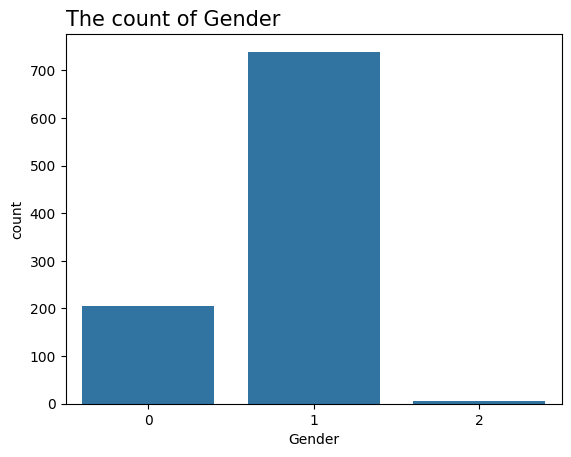

In [266]:
sns.countplot(data=df,x='Gender')
plt.title('The count of Gender',size = 15,loc='left')

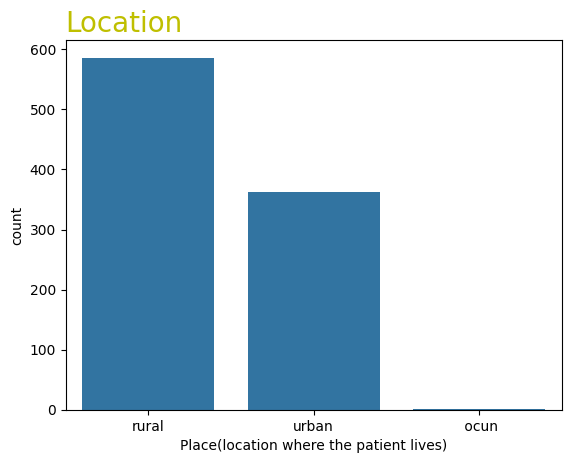

In [123]:
sns.countplot(data=df,x='Place(location where the patient lives)')
plt.title("Location",color='y',size=20,loc='left')
plt.show()

Text(0.5, 1.0, 'Outcome')

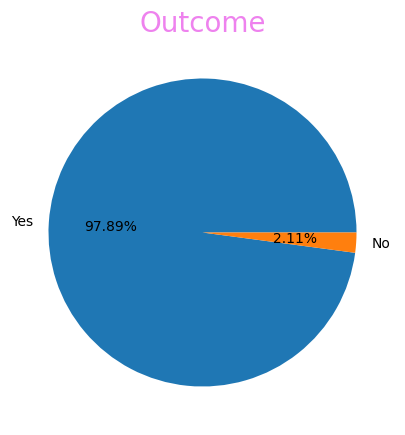

In [124]:
plt.figure(figsize=(10,5))
plt.pie(df.Outcome.value_counts().values,labels=['Yes','No'],autopct='%1.2f%%')
plt.title('Outcome',color='violet',size=20)

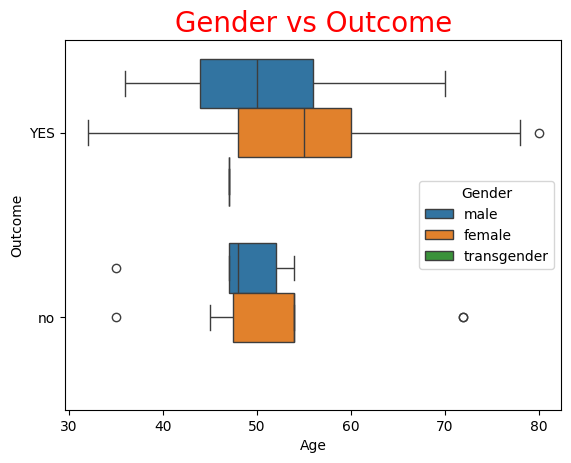

In [125]:
sns.boxplot(x='Age',y='Outcome',data=df,hue='Gender')
plt.title('Gender vs Outcome',color='red',size=20)
plt.show()

<Axes: ylabel='Age'>

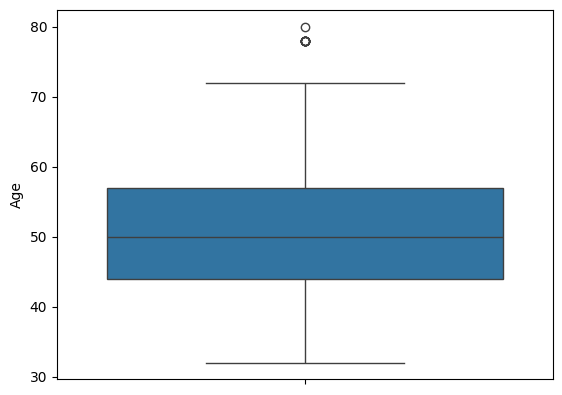

In [126]:
sns.boxplot(df['Age'])

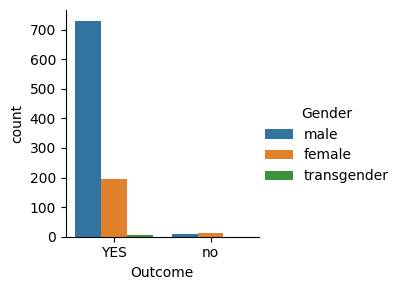

In [127]:
sns.catplot(x='Outcome',hue='Gender',data=df,kind='count',height=3)

Text(0.5, 1.0, 'Place vs Age')

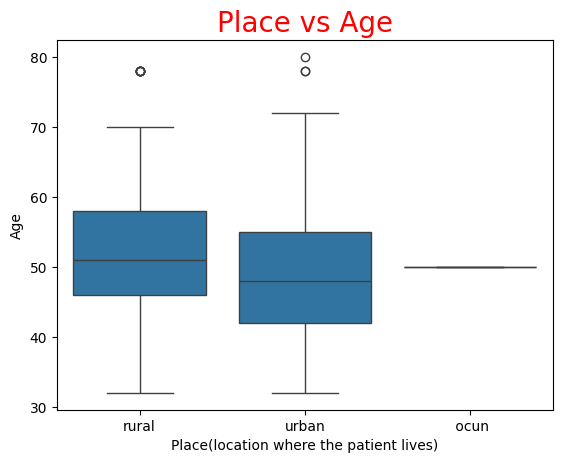

In [128]:
sns.boxplot(x='Place(location where the patient lives)',y='Age',data=df)
plt.title('Place vs Age',color='red',size=20)

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

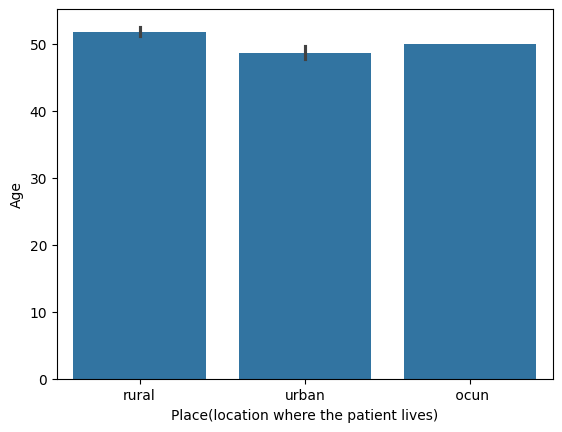

In [129]:
sns.barplot(x=df['Place(location where the patient lives)'],y=df['Age'])

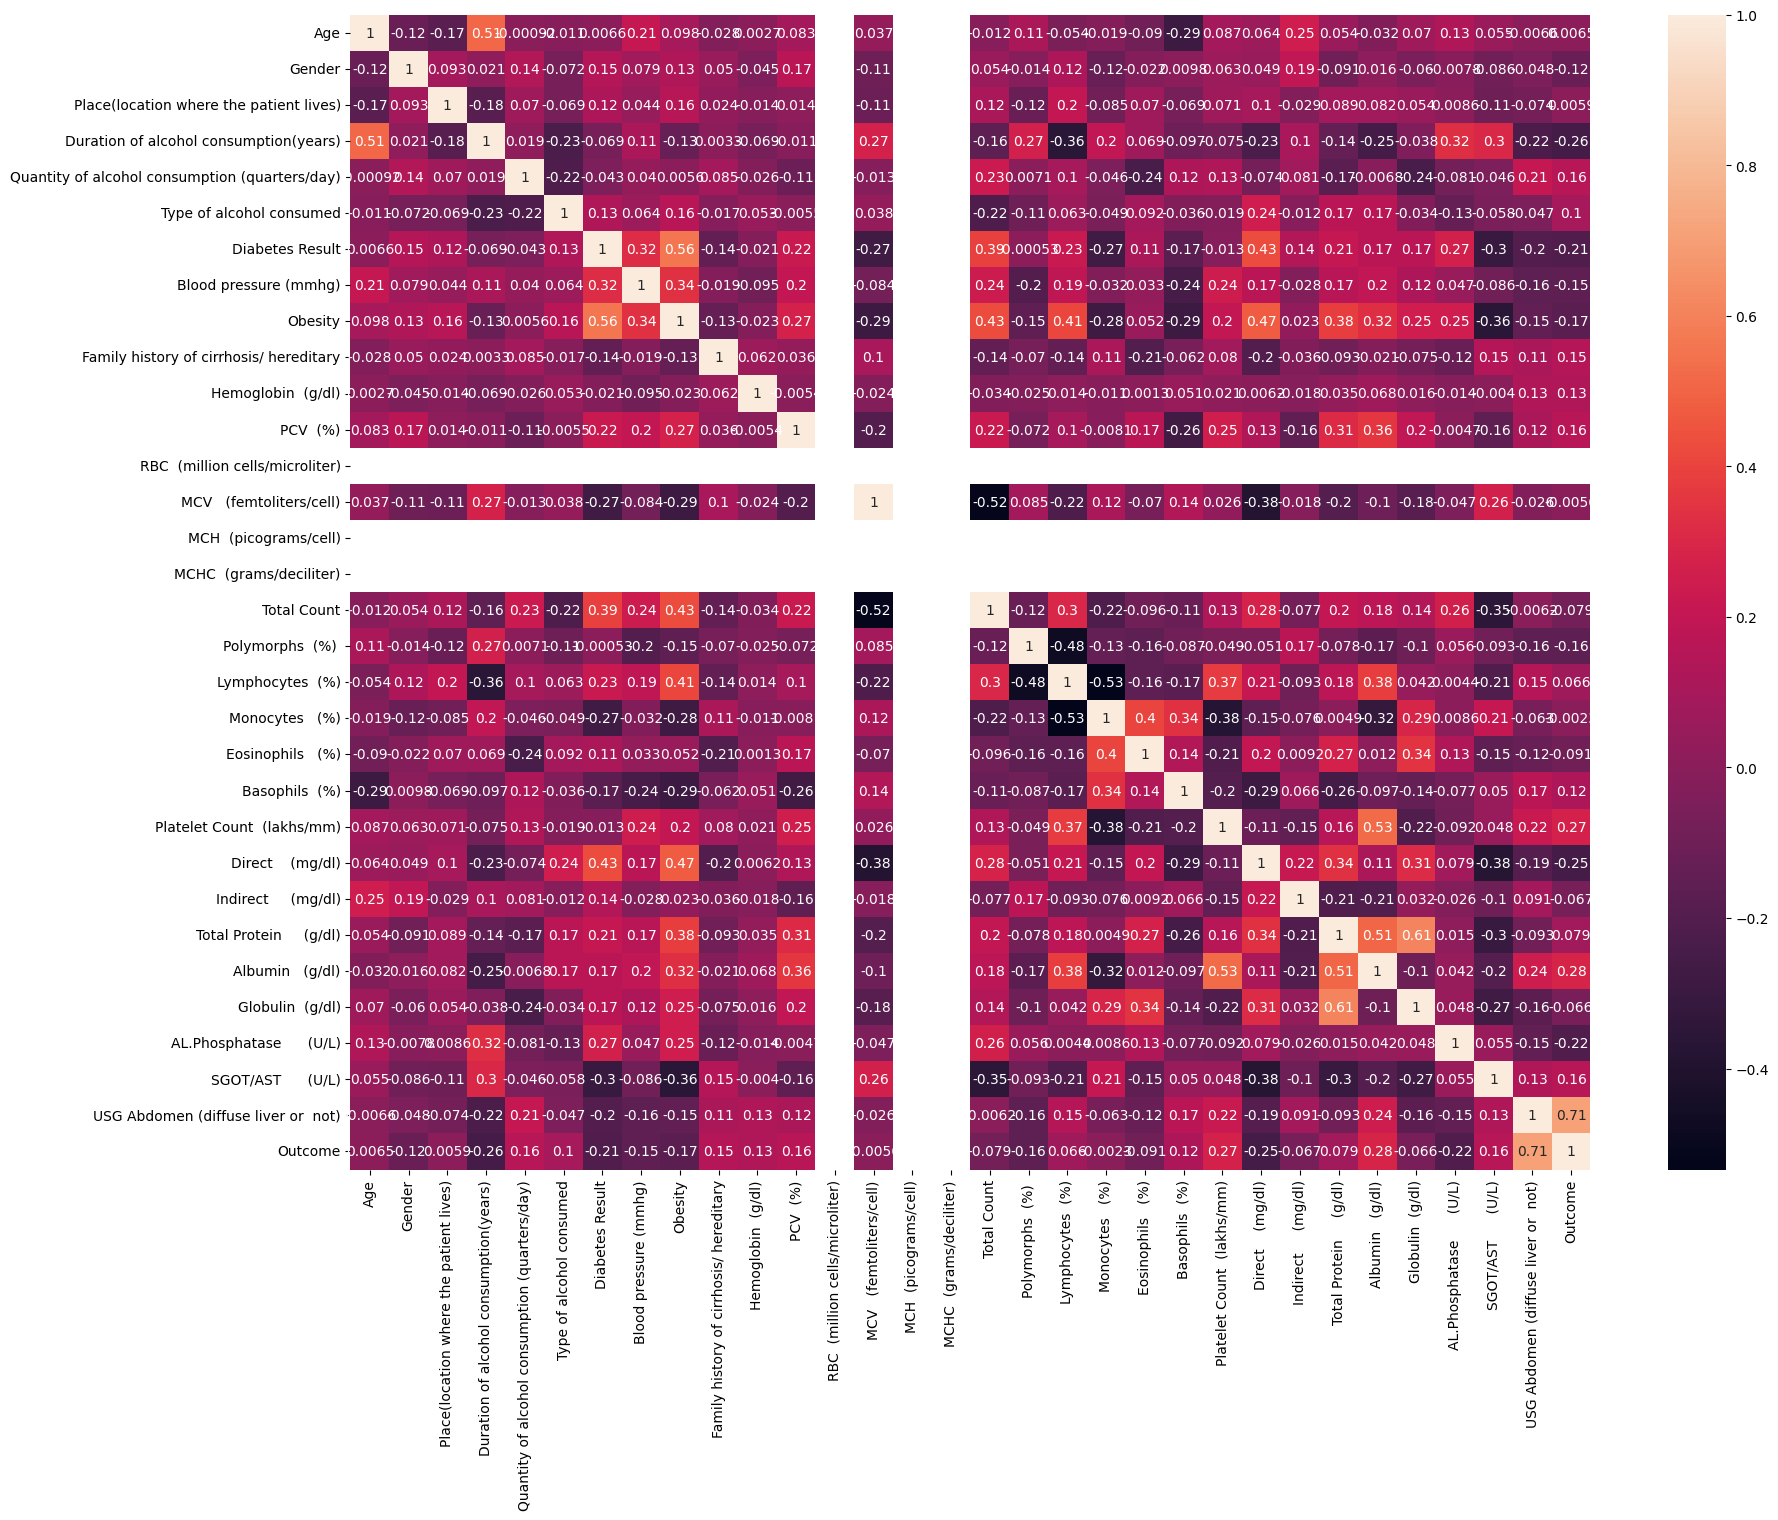

In [268]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [132]:
df.drop(['SGPT/ALT (U/L)'],axis=1,inplace=True)

In [133]:
pd.crosstab(df['Age'],df['Diabetes Result'])

Diabetes Result,NO,YES
Age,,
32,0,8
35,8,2
36,2,9
37,1,10
38,22,43
39,0,10
40,2,19
42,46,26
43,3,19


<Axes: xlabel='Gender', ylabel='Age'>

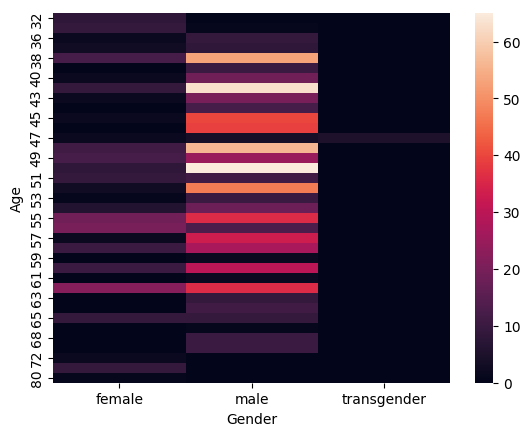

In [134]:
sns.heatmap(pd.crosstab(df['Age'],df['Gender']))

<Axes: xlabel='Diabetes Result', ylabel='Count'>

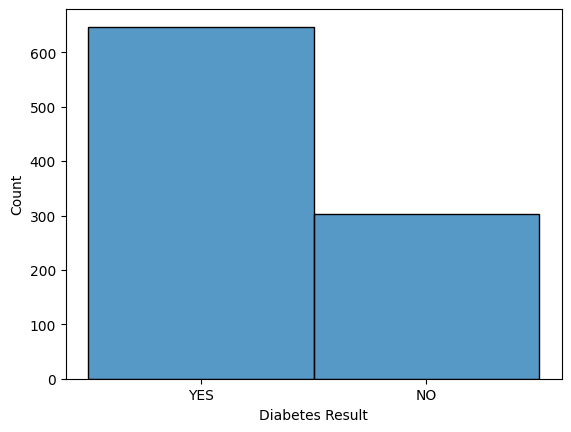

In [135]:
sns.histplot(df['Diabetes Result'])

# Outliers

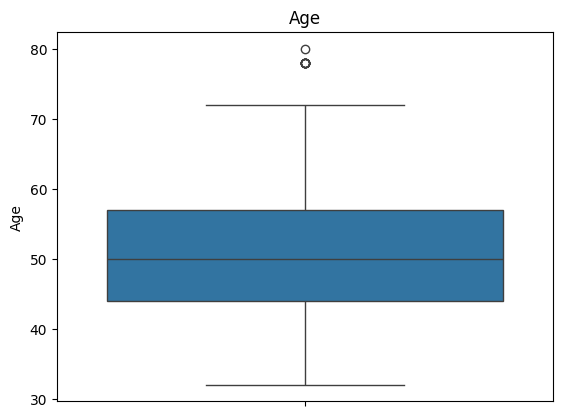

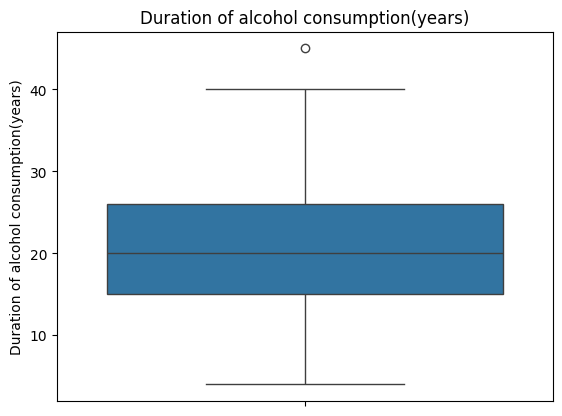

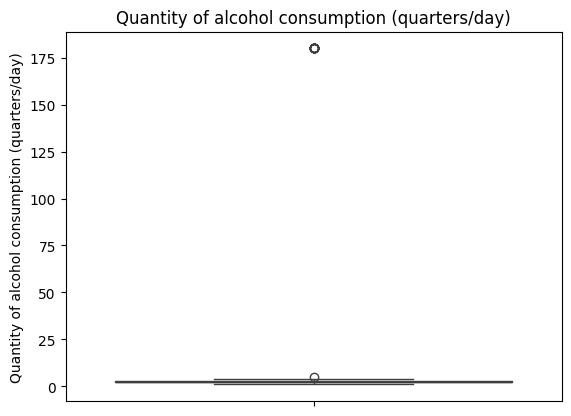

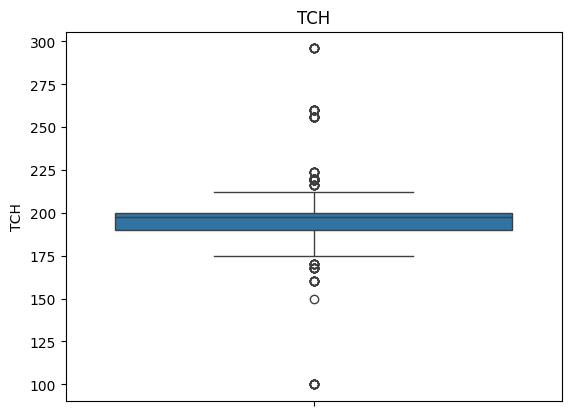

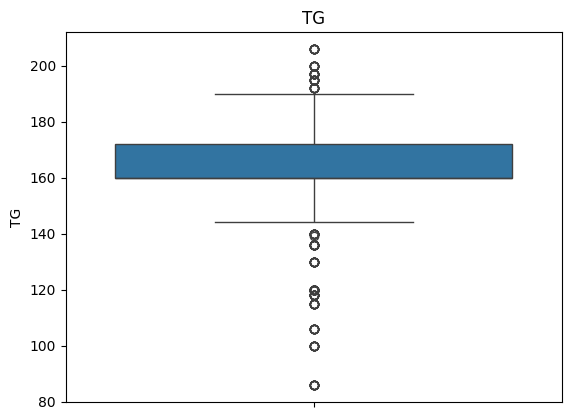

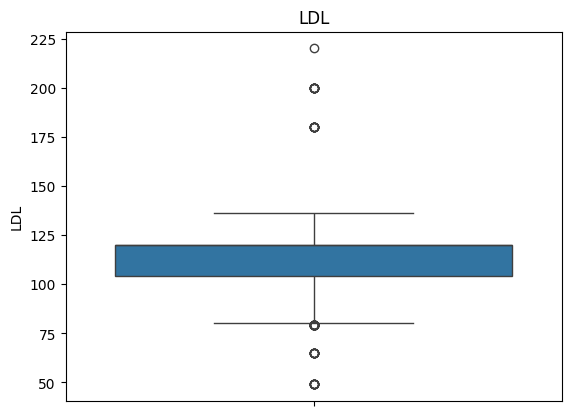

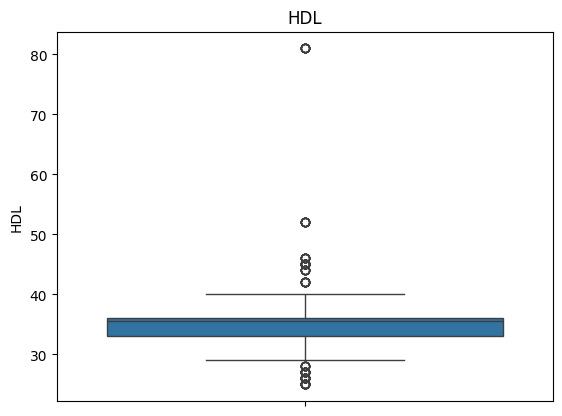

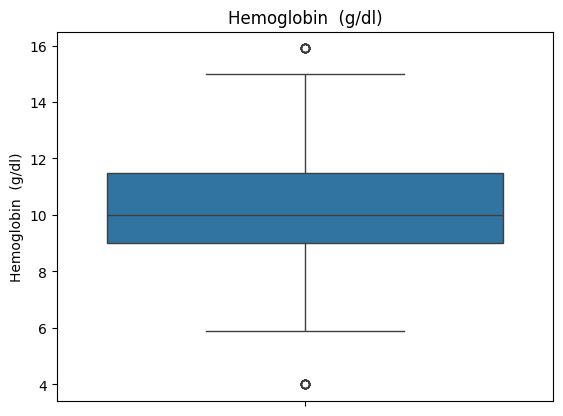

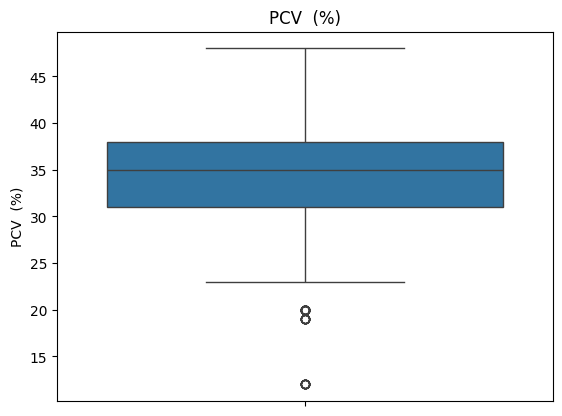

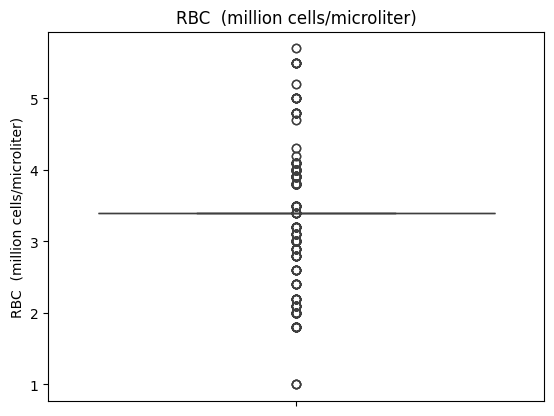

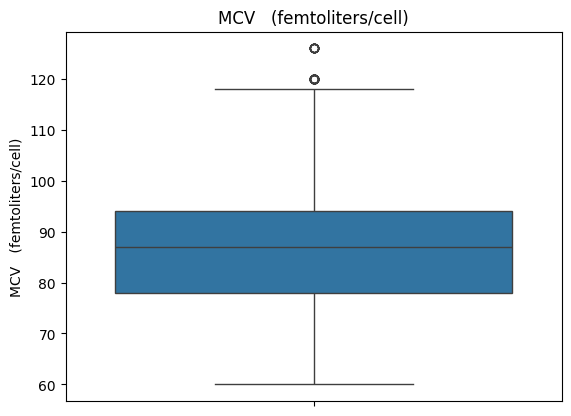

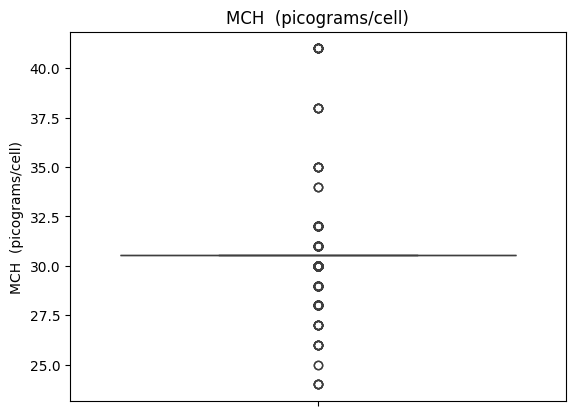

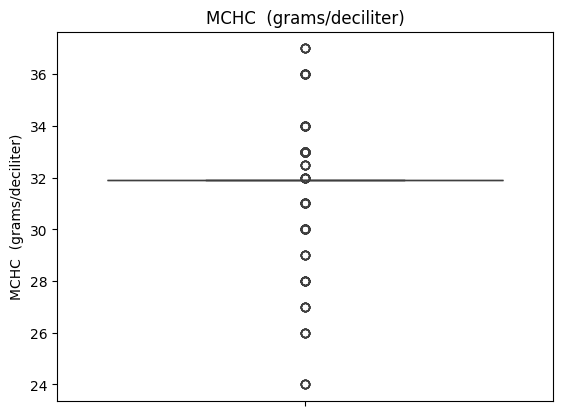

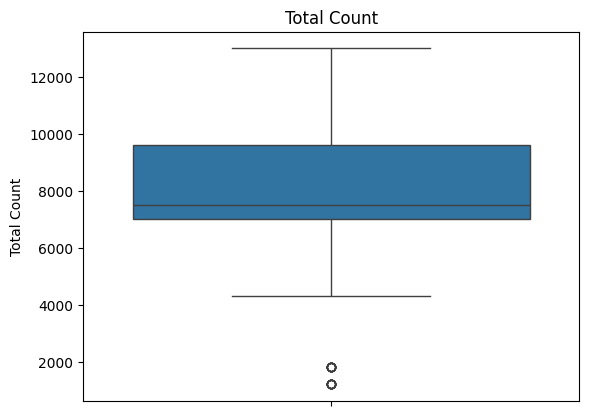

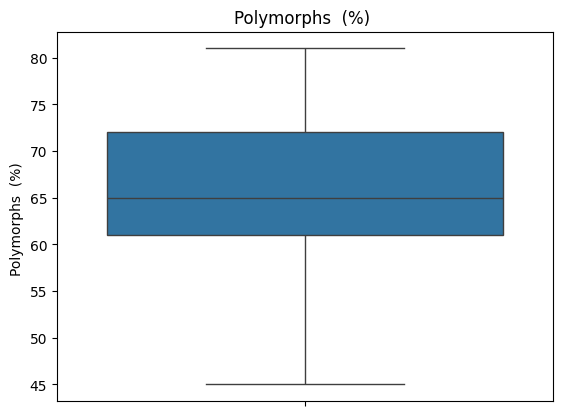

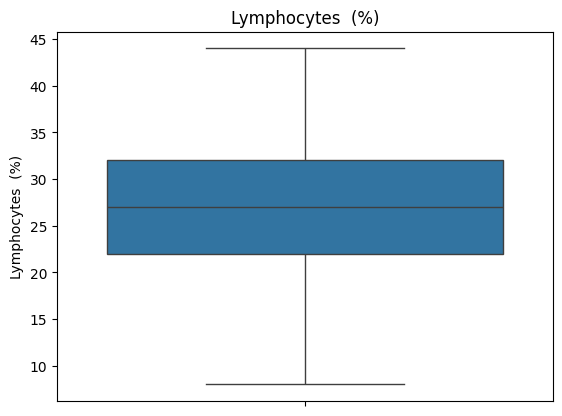

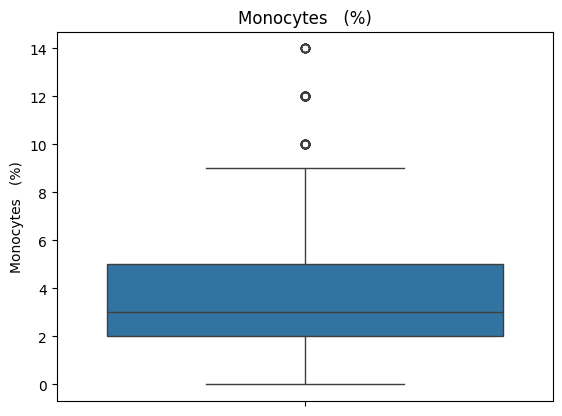

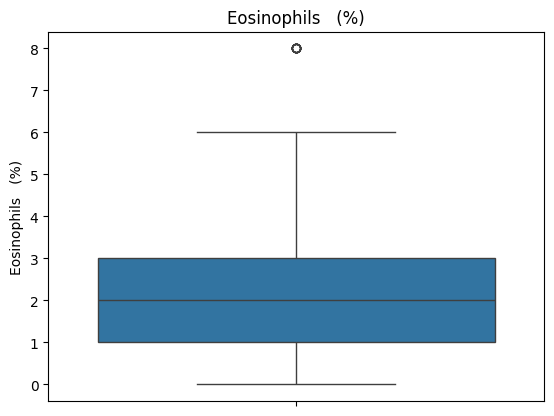

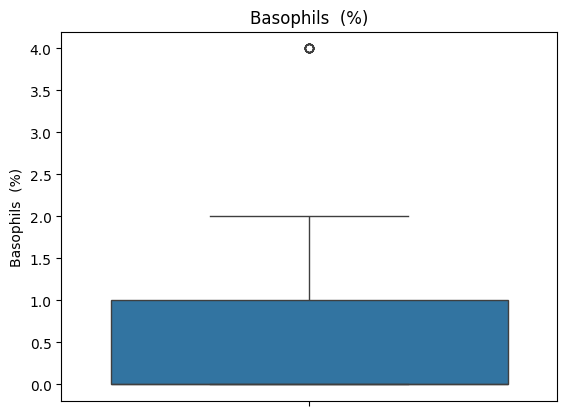

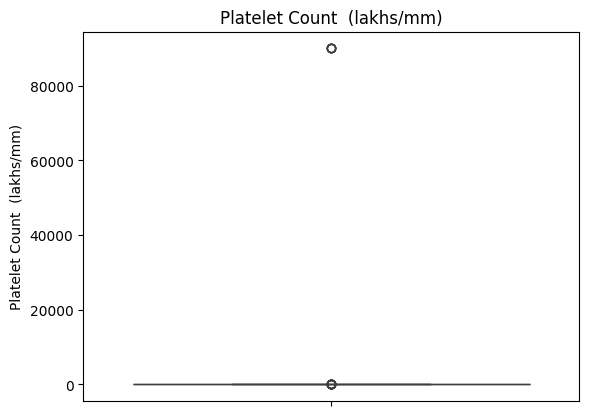

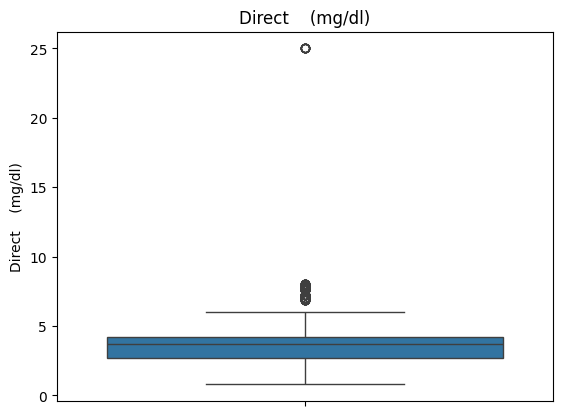

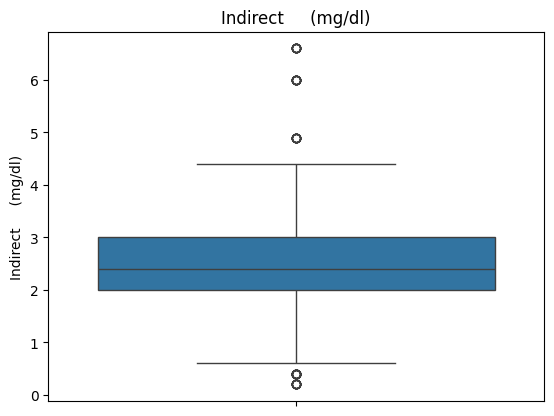

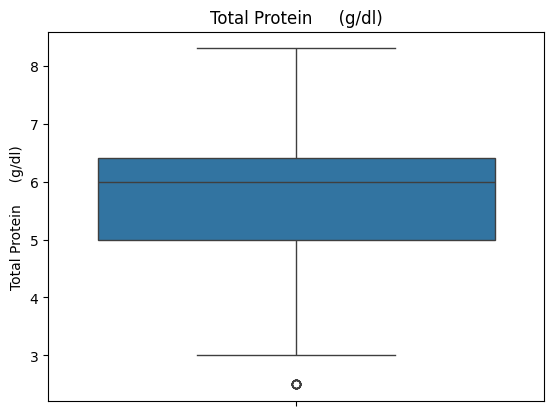

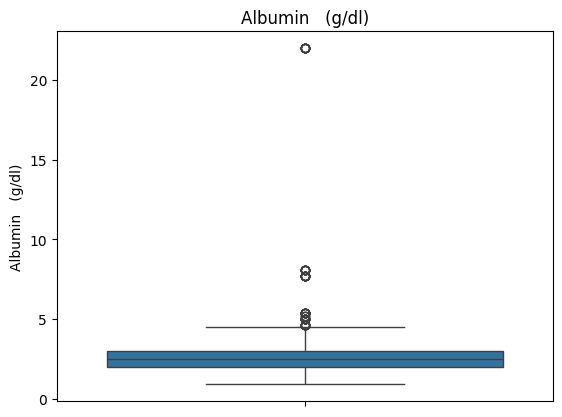

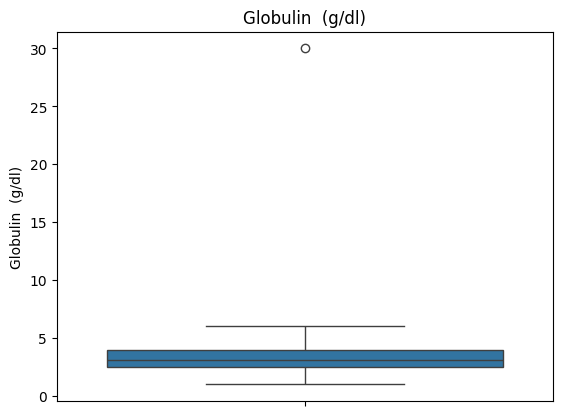

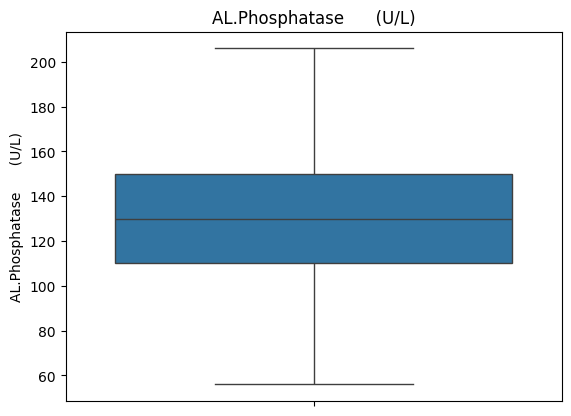

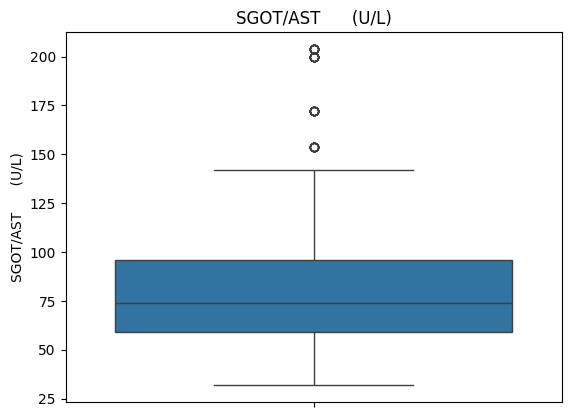

In [136]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

array([15., 26.])

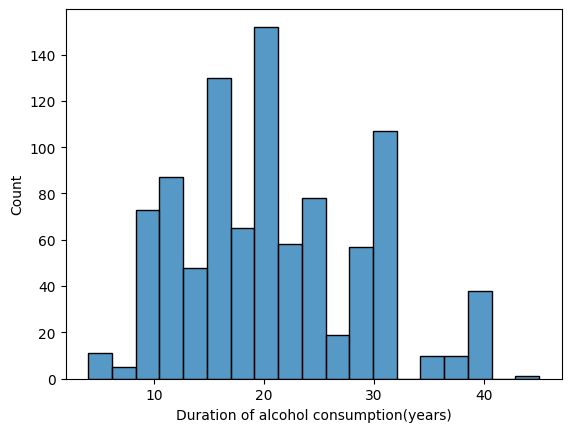

In [137]:
sns.histplot(df['Duration of alcohol consumption(years)'])
np.percentile(df['Duration of alcohol consumption(years)'],[25,75])

array([44., 57.])

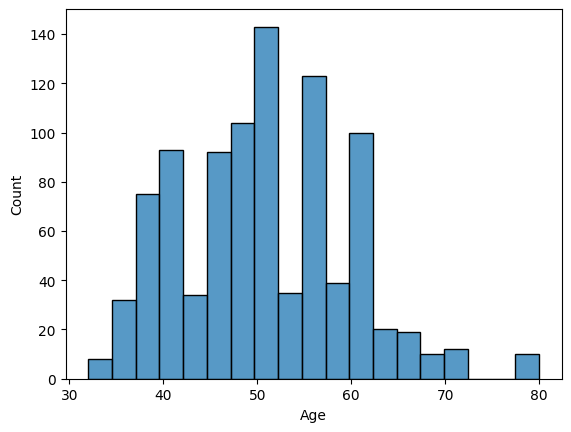

In [138]:
sns.histplot(df['Age'])
np.percentile(df['Age'],[25,75])

Text(0.5, 1.0, 'Duration of alcohol consumption(years) comparing with Gender')

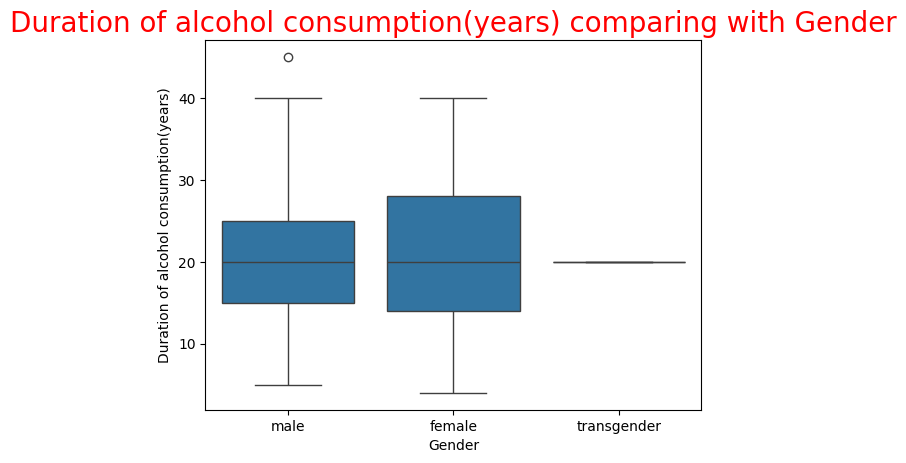

In [139]:
sns.boxplot(data=df,x='Gender',y='Duration of alcohol consumption(years)')
plt.title('Duration of alcohol consumption(years) comparing with Gender',color='Red',size=20)

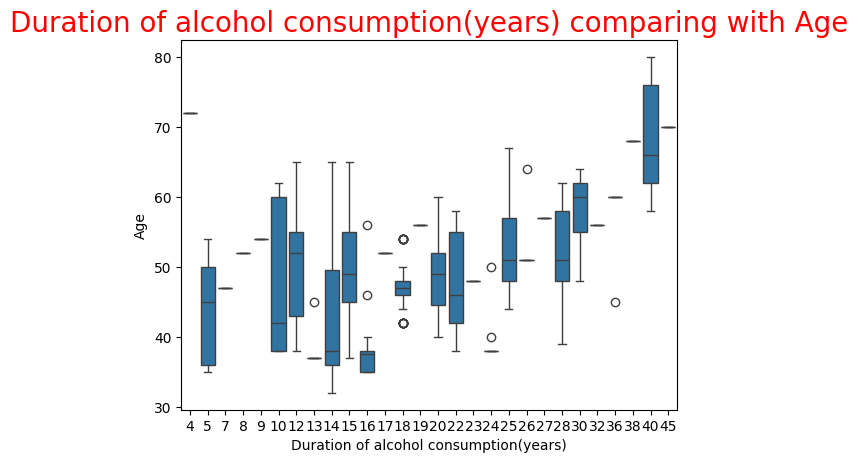

In [140]:
sns.boxplot(data=df,x='Duration of alcohol consumption(years)',y='Age')
plt.title('Duration of alcohol consumption(years) comparing with Age',color='Red',size=20)
plt.show()

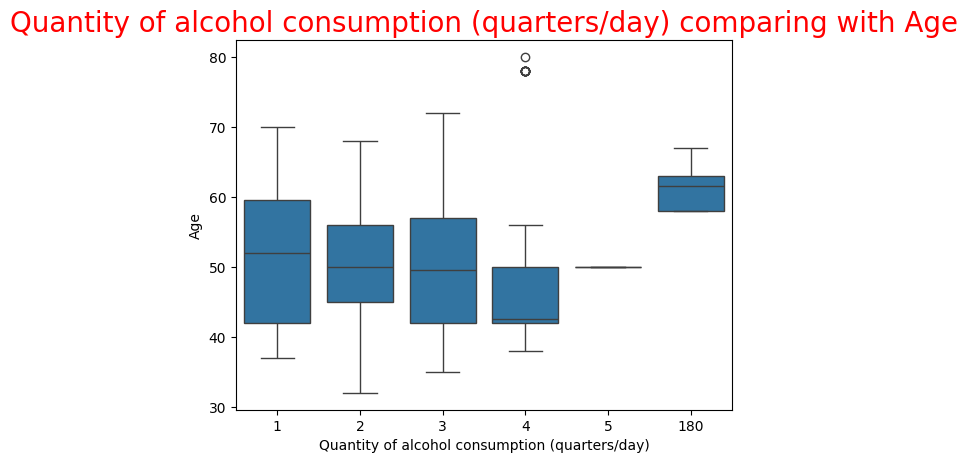

In [141]:
sns.boxplot(data=df,x='Quantity of alcohol consumption (quarters/day)',y='Age')
plt.title('Quantity of alcohol consumption (quarters/day) comparing with Age',color='Red',size=20)
plt.show()

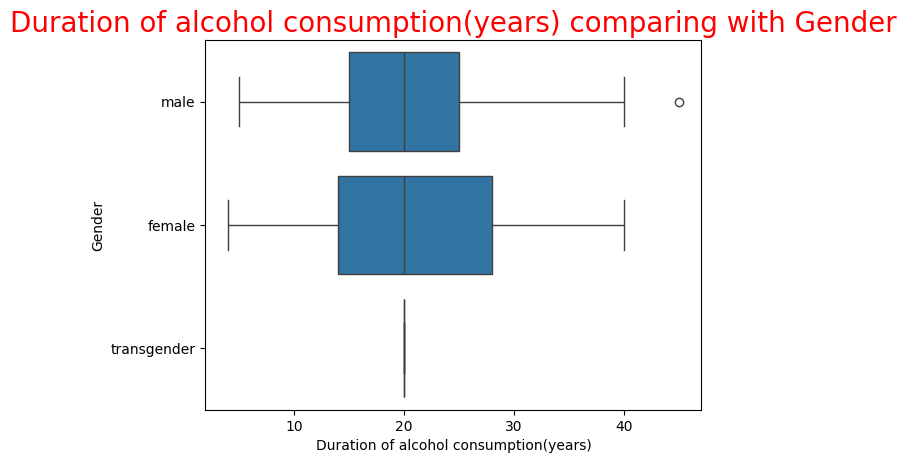

In [142]:
sns.boxplot(data=df,x='Duration of alcohol consumption(years)',y='Gender')
plt.title('Duration of alcohol consumption(years) comparing with Gender',color='Red',size=20)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

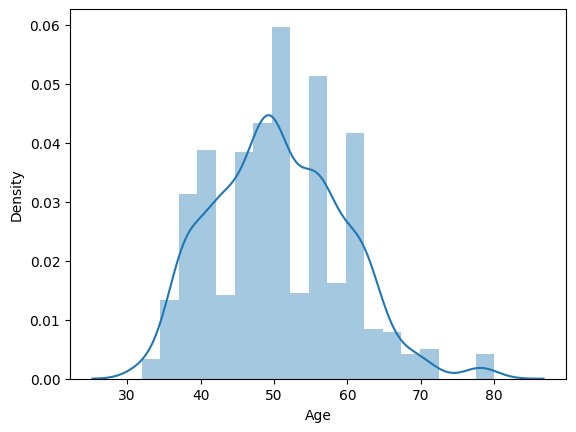

In [143]:
sns.distplot(df['Age'])

<Axes: ylabel='Age'>

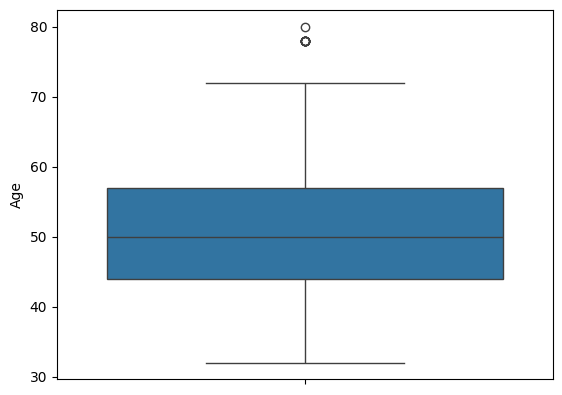

In [144]:
sns.boxplot(df['Age'])

<Axes: ylabel='TCH'>

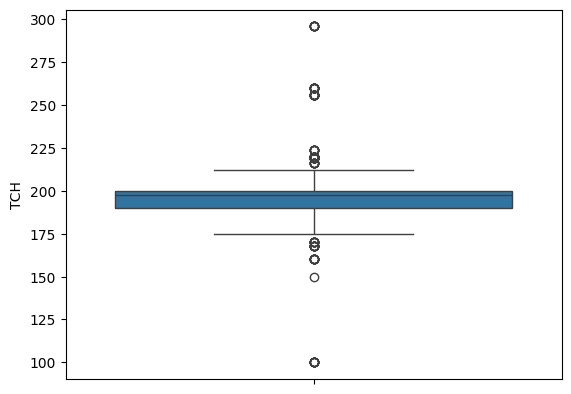

In [145]:
sns.boxplot(df['TCH'])

# z-score

In [146]:
# This code calculates the upper and lower limits for the 'Age' column using the mean and standard deviation, where the limits are three standard deviations away from the mean, and then prints these values.

upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print('upper limit :',upper_limit)
print('lower limit:' , lower_limit)

upper limit : 77.07096989852911
lower limit: 24.193519037192708


In [147]:
# This code selects and displays rows from the DataFrame `df` where the 'Age' column values are either above the calculated upper limit or below the calculated lower limit.

df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),...,Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),USG Abdomen (diffuse liver or not),Outcome
397,78,female,rural,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
417,78,female,urban,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
437,78,female,urban,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
457,78,female,rural,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
477,78,female,rural,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
497,78,female,rural,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
517,78,female,rural,40,4,branded liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
537,78,female,rural,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
557,78,female,rural,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES
577,80,female,urban,40,4,country liquor,negative,negative,YES,80/60,...,1.8,3.2,2.0,6.0,3.2,2.8,160.0,75,YES,YES


In [148]:
new_df = df.loc[(df['Age'] < upper_limit) | (df['Age'] > lower_limit)]
print("old data:", len(df))
print("new data:", len(new_df))


old data: 949
new data: 949


In [149]:
new_df = df.copy()
new_df.loc[new_df['Age'] > upper_limit, 'Age'  ] = upper_limit
new_df.loc[new_df['Age'] < lower_limit, 'Age'  ] = lower_limit

<Axes: ylabel='Age'>

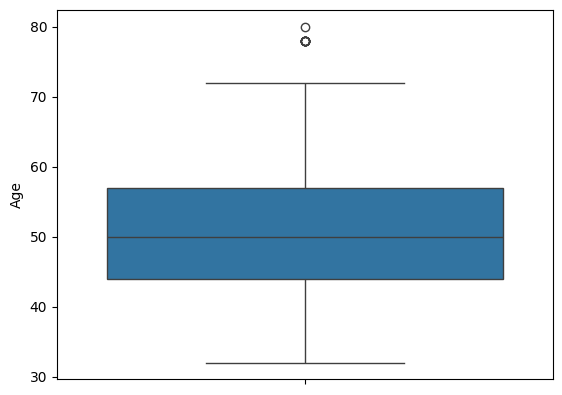

In [150]:
sns.boxplot(df['Age'])

In [151]:
len(new_df)

949

In [152]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

In [153]:
q1,q3,iqr

(np.float64(44.0), np.float64(57.0), np.float64(13.0))

In [154]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit

(np.float64(24.5), np.float64(76.5))

In [155]:
df['Age'] = np.where(df['Age'] > upper_limit , upper_limit ,
                         np.where(df['Age'] < lower_limit , lower_limit , df['Age']))

<Axes: ylabel='Age'>

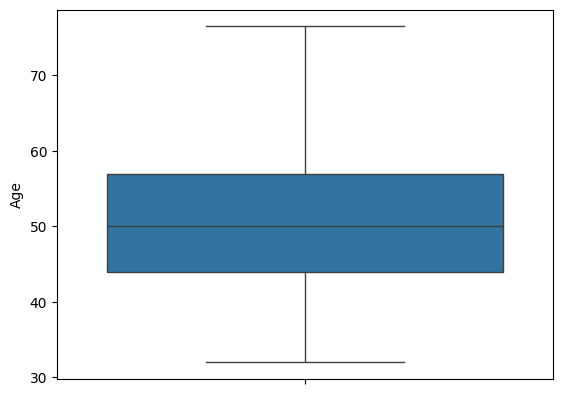

In [156]:
sns.boxplot(df['Age'])

<Axes: ylabel='Age'>

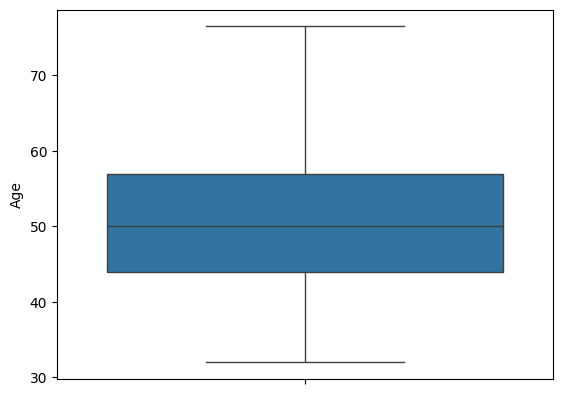

In [157]:
sns.boxplot(df['Age'])

<Axes: ylabel='Duration of alcohol consumption(years)'>

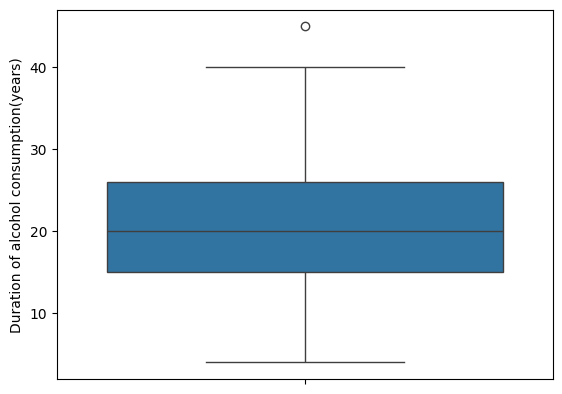

In [158]:
sns.boxplot(df['Duration of alcohol consumption(years)'])

In [159]:
q1 = df['Duration of alcohol consumption(years)'].quantile(0.25)
q3 = df['Duration of alcohol consumption(years)'].quantile(0.75)
iqr = q3 - q1

In [160]:
q1,q3,iqr

(np.float64(15.0), np.float64(26.0), np.float64(11.0))

In [161]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit

(np.float64(-1.5), np.float64(42.5))

In [162]:
df['Duration of alcohol consumption(years)'] = np.where(df['Duration of alcohol consumption(years)'] > upper_limit , upper_limit ,
                         np.where(df['Duration of alcohol consumption(years)'] < lower_limit , lower_limit , df['Duration of alcohol consumption(years)']))

<Axes: ylabel='Duration of alcohol consumption(years)'>

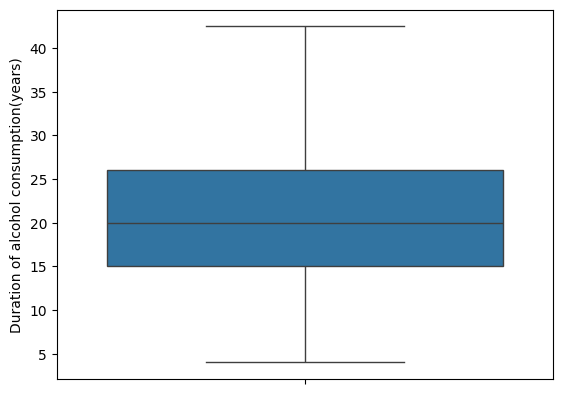

In [163]:
sns.boxplot(df['Duration of alcohol consumption(years)'])

<Axes: ylabel='TCH'>

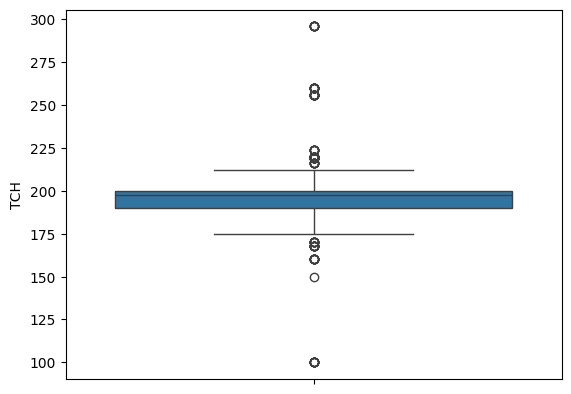

In [164]:
sns.boxplot(df['TCH'])

In [165]:
q1 = df['TCH'].quantile(0.25)
q3 = df['TCH'].quantile(0.75)
iqr = q3 - q1

In [166]:
q1,q3,iqr

(np.float64(190.0), np.float64(200.0), np.float64(10.0))

In [167]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit

(np.float64(175.0), np.float64(215.0))

In [168]:
df['TCH'] = np.where(df['TCH'] > upper_limit , upper_limit ,
                         np.where(df['TCH'] < lower_limit , lower_limit , df['TCH']))

<Axes: ylabel='TCH'>

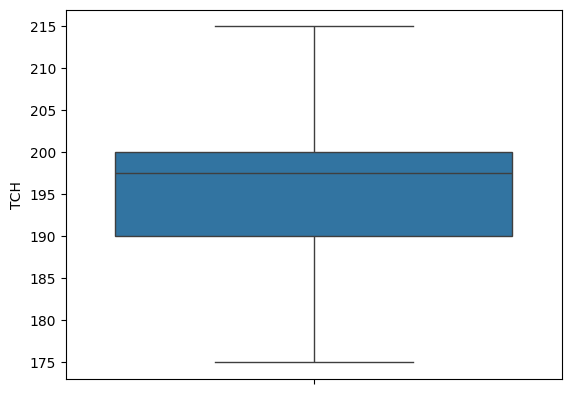

In [169]:
sns.boxplot(df['TCH'])

<Axes: ylabel='Quantity of alcohol consumption (quarters/day)'>

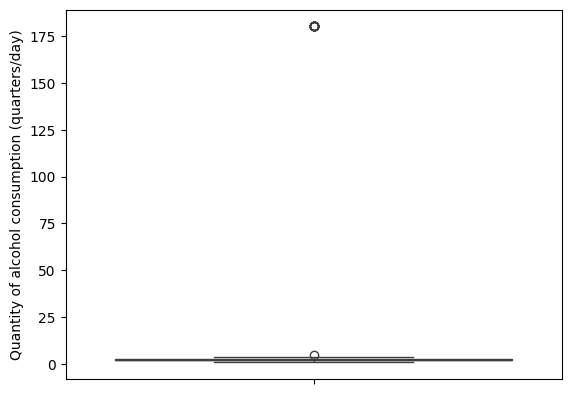

In [170]:
sns.boxplot(df['Quantity of alcohol consumption (quarters/day)'])

In [171]:
q1 = df['Quantity of alcohol consumption (quarters/day)'].quantile(0.25)
q3 = df['Quantity of alcohol consumption (quarters/day)'].quantile(0.75)
iqr = q3 - q1

In [172]:
q1,q3,iqr

(np.float64(2.0), np.float64(3.0), np.float64(1.0))

In [173]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit

(np.float64(0.5), np.float64(4.5))

In [174]:
df['Quantity of alcohol consumption (quarters/day)'] = np.where(df['Quantity of alcohol consumption (quarters/day)'] > upper_limit , upper_limit ,
                         np.where(df['Quantity of alcohol consumption (quarters/day)'] < lower_limit , lower_limit , df['Quantity of alcohol consumption (quarters/day)']))

<Axes: ylabel='Quantity of alcohol consumption (quarters/day)'>

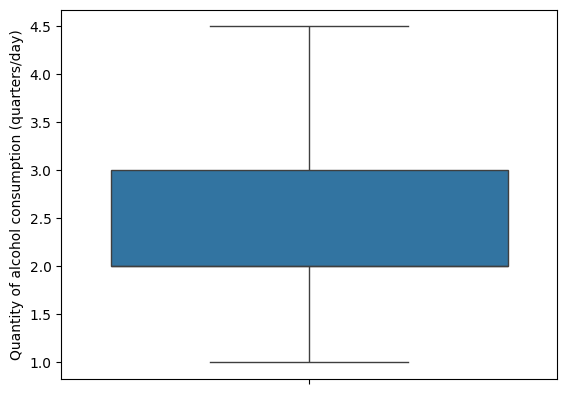

In [175]:
sns.boxplot(df['Quantity of alcohol consumption (quarters/day)'])

<Axes: ylabel='TG'>

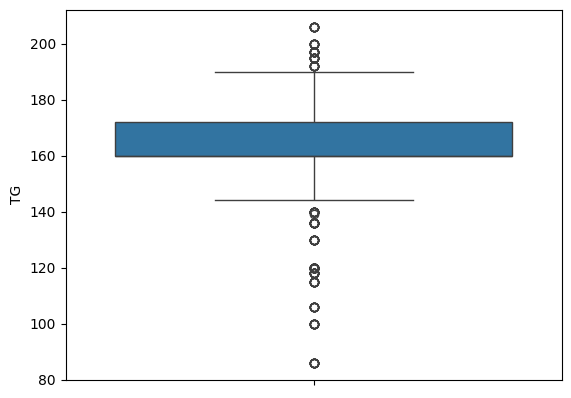

In [176]:
sns.boxplot(df['TG'])

In [177]:
q1 = df['TG'].quantile(0.25)
q3 = df['TG'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit

(142.0, 190.0)

In [178]:
df['TG'] = np.where(df['TG'] > upper_limit , upper_limit ,
                         np.where(df['TG'] < lower_limit , lower_limit , df['TG']))

<Axes: ylabel='TG'>

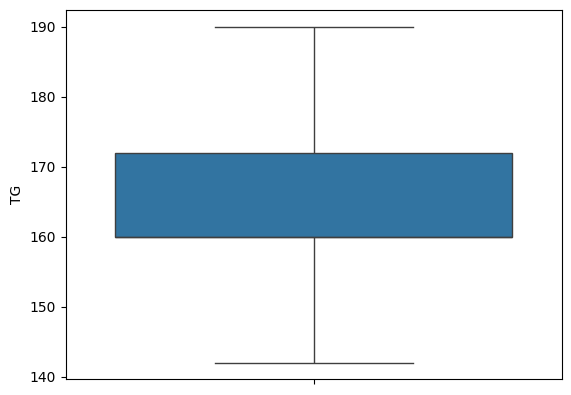

In [179]:
sns.boxplot(df['TG'])

<Axes: ylabel='LDL'>

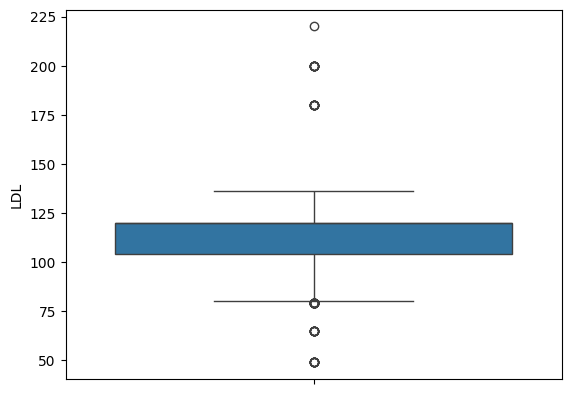

In [180]:
sns.boxplot(df['LDL'])

In [181]:
q1 = df['LDL'].quantile(0.25)
q3 = df['LDL'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['LDL'] = np.where(df['LDL'] > upper_limit , upper_limit ,
                         np.where(df['LDL'] < lower_limit , lower_limit , df['LDL']))

<Axes: ylabel='LDL'>

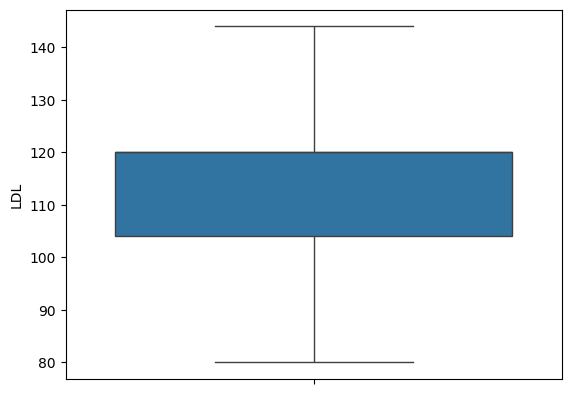

In [182]:
sns.boxplot(df['LDL'])

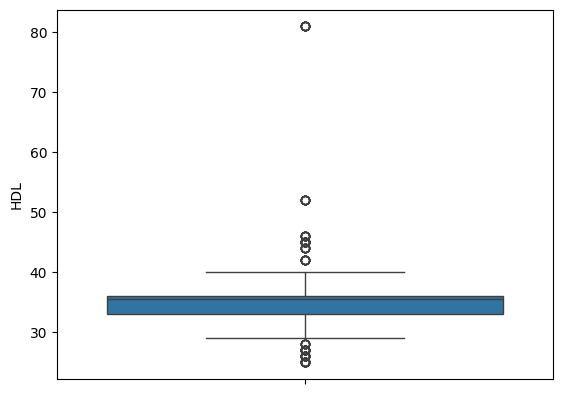

In [183]:
sns.boxplot(df['HDL'])
q1 = df['HDL'].quantile(0.25)
q3 = df['HDL'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['HDL'] = np.where(df['HDL'] > upper_limit , upper_limit ,
                         np.where(df['HDL'] < lower_limit , lower_limit , df['HDL']))

<Axes: ylabel='HDL'>

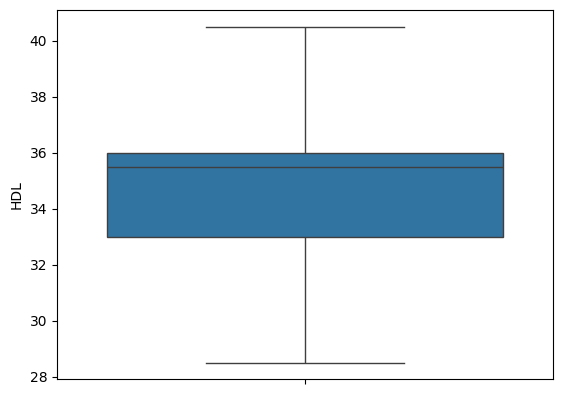

In [184]:
sns.boxplot(df['HDL'])

<Axes: ylabel='Hemoglobin  (g/dl)'>

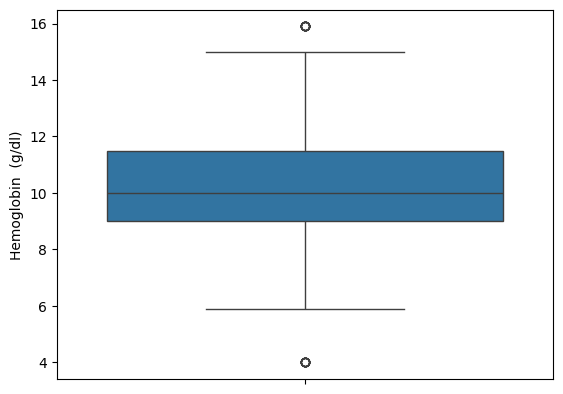

In [185]:
sns.boxplot(df['Hemoglobin  (g/dl)'])

In [186]:
q1 = df['Hemoglobin  (g/dl)'].quantile(0.25)
q3 = df['Hemoglobin  (g/dl)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Hemoglobin  (g/dl)'] = np.where(df['Hemoglobin  (g/dl)'] > upper_limit , upper_limit ,
                         np.where(df['Hemoglobin  (g/dl)'] < lower_limit , lower_limit , df['Hemoglobin  (g/dl)']))

<Axes: ylabel='Hemoglobin  (g/dl)'>

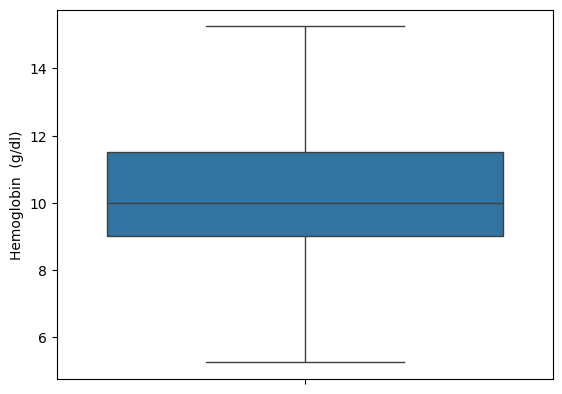

In [187]:
sns.boxplot(df['Hemoglobin  (g/dl)'])

<Axes: ylabel='PCV  (%)'>

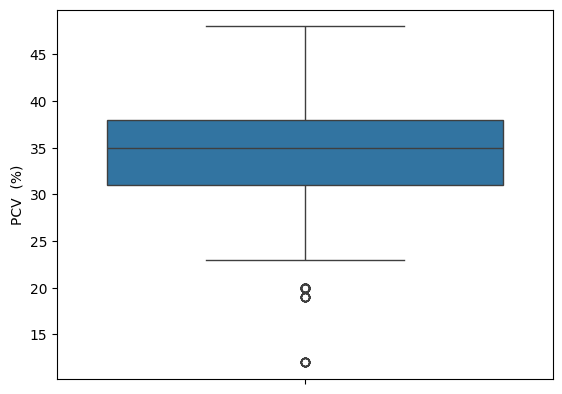

In [188]:
sns.boxplot(df['PCV  (%)'])

In [189]:
q1 = df['PCV  (%)'].quantile(0.25)
q3 = df['PCV  (%)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['PCV  (%)'] = np.where(df['PCV  (%)'] > upper_limit , upper_limit ,
                         np.where(df['PCV  (%)'] < lower_limit , lower_limit , df['PCV  (%)']))

<Axes: ylabel='PCV  (%)'>

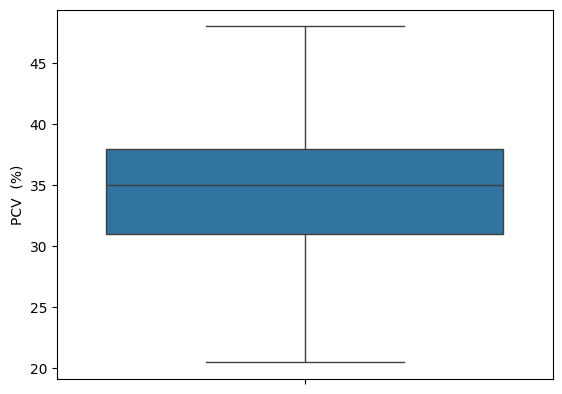

In [190]:
sns.boxplot(df['PCV  (%)'])

<Axes: ylabel='RBC  (million cells/microliter)'>

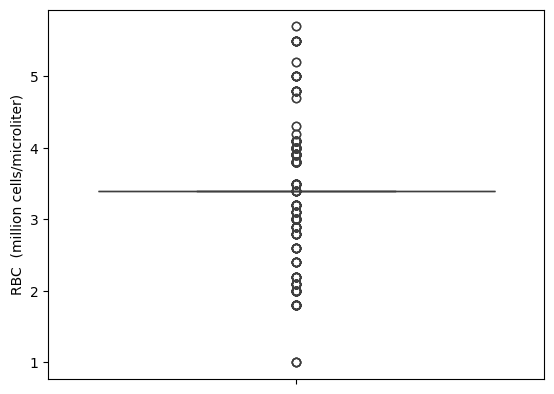

In [191]:
sns.boxplot(df['RBC  (million cells/microliter)'])

In [192]:
q1 = df['RBC  (million cells/microliter)'].quantile(0.25)
q3 = df['RBC  (million cells/microliter)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['RBC  (million cells/microliter)'] = np.where(df['RBC  (million cells/microliter)'] > upper_limit , upper_limit ,
                         np.where(df['RBC  (million cells/microliter)'] < lower_limit , lower_limit , df['RBC  (million cells/microliter)']))

<Axes: ylabel='RBC  (million cells/microliter)'>

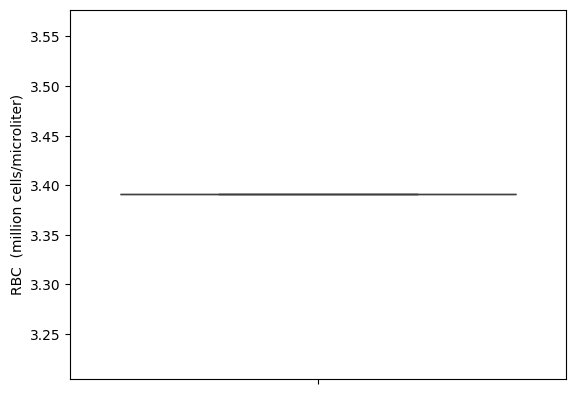

In [193]:
sns.boxplot(df['RBC  (million cells/microliter)'])

<Axes: ylabel='MCV   (femtoliters/cell)'>

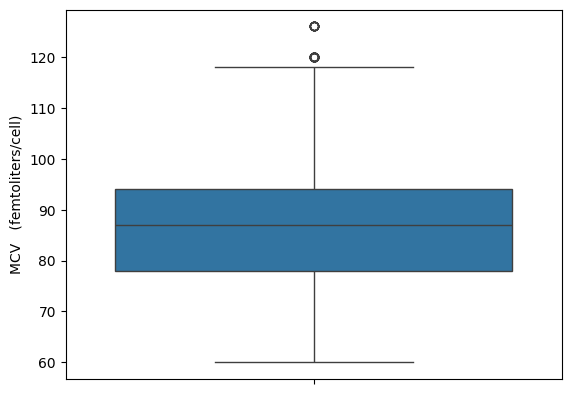

In [194]:
sns.boxplot(df['MCV   (femtoliters/cell)'])

In [195]:
q1 = df['MCV   (femtoliters/cell)'].quantile(0.25)
q3 = df['MCV   (femtoliters/cell)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['MCV   (femtoliters/cell)'] = np.where(df['MCV   (femtoliters/cell)'] > upper_limit , upper_limit ,
                         np.where(df['MCV   (femtoliters/cell)'] < lower_limit , lower_limit , df['MCV   (femtoliters/cell)']))

<Axes: ylabel='MCV   (femtoliters/cell)'>

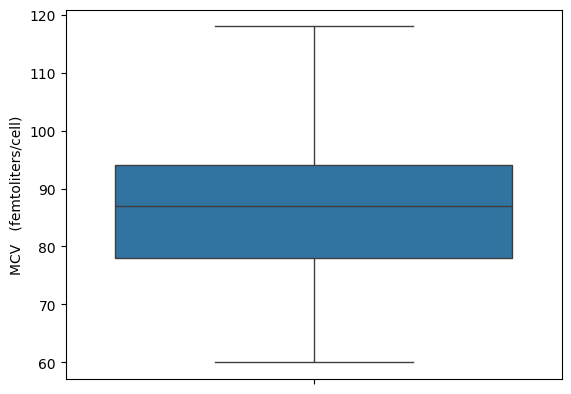

In [196]:
sns.boxplot(df['MCV   (femtoliters/cell)'])

<Axes: ylabel='MCH  (picograms/cell)'>

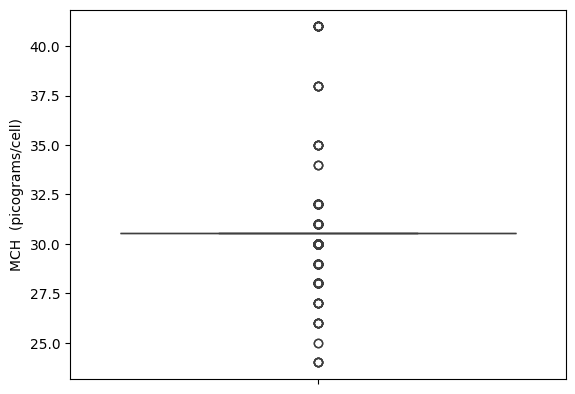

In [197]:
sns.boxplot(df['MCH  (picograms/cell)'])

In [198]:
q1 = df['MCH  (picograms/cell)'].quantile(0.25)
q3 = df['MCH  (picograms/cell)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['MCH  (picograms/cell)'] = np.where(df['MCH  (picograms/cell)'] > upper_limit , upper_limit ,
                         np.where(df['MCH  (picograms/cell)'] < lower_limit , lower_limit , df['MCH  (picograms/cell)']))

<Axes: ylabel='MCH  (picograms/cell)'>

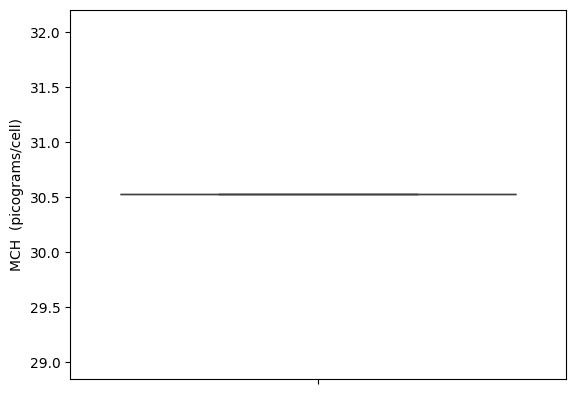

In [199]:
sns.boxplot(df['MCH  (picograms/cell)'])

<Axes: ylabel='MCHC  (grams/deciliter)'>

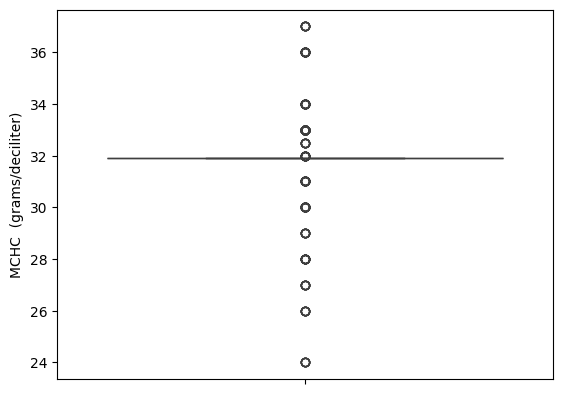

In [200]:
sns.boxplot(df['MCHC  (grams/deciliter)'])

In [201]:
q1 = df['MCHC  (grams/deciliter)'].quantile(0.25)
q3 = df['MCHC  (grams/deciliter)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['MCHC  (grams/deciliter)'] = np.where(df['MCHC  (grams/deciliter)'] > upper_limit , upper_limit ,
                         np.where(df['MCHC  (grams/deciliter)'] < lower_limit , lower_limit , df['MCHC  (grams/deciliter)']))

<Axes: ylabel='MCHC  (grams/deciliter)'>

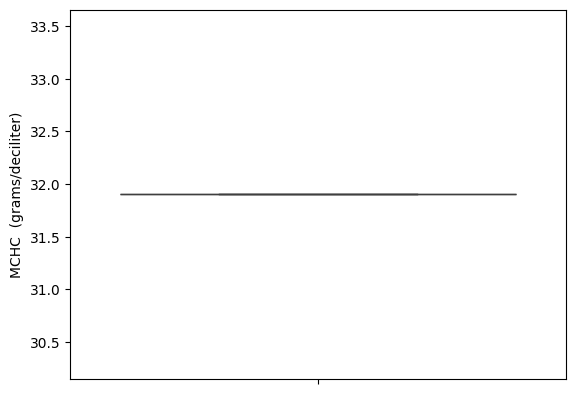

In [202]:
sns.boxplot(df['MCHC  (grams/deciliter)'])

<Axes: ylabel='Total Count'>

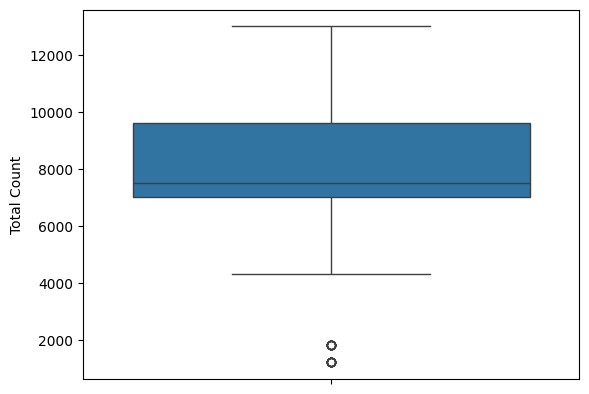

In [203]:
sns.boxplot(df['Total Count'])

In [204]:
q1 = df['Total Count'].quantile(0.25)
q3 = df['Total Count'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Total Count'] = np.where(df['Total Count'] > upper_limit , upper_limit ,
                         np.where(df['Total Count'] < lower_limit , lower_limit , df['Total Count']))

<Axes: ylabel='Total Count'>

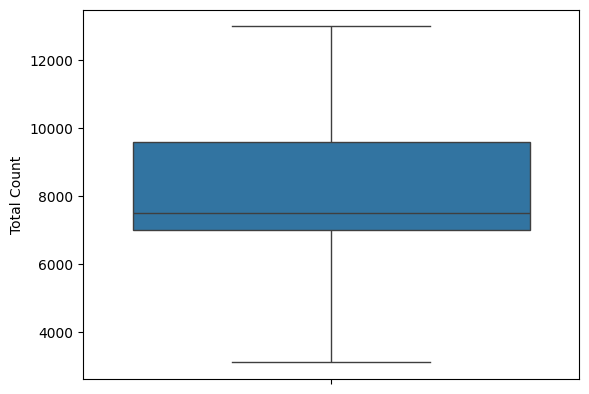

In [205]:
sns.boxplot(df['Total Count'])

<Axes: ylabel='Monocytes   (%)'>

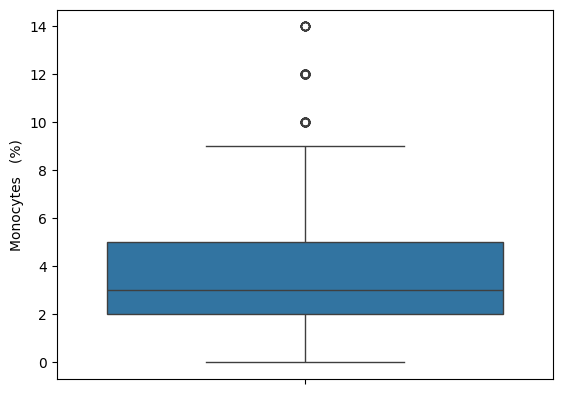

In [206]:
sns.boxplot(df['Monocytes   (%)'])

In [207]:
# This code calculates the interquartile range (IQR) for the 'Monocytes (%)' column to determine the upper and lower limits for detecting outliers, then caps the values in 'Monocytes (%)' to these limits, replacing any values above the upper limit with the upper limit and any values below the lower limit with the lower limit.

q1 = df['Monocytes   (%)'].quantile(0.25)
q3 = df['Monocytes   (%)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Monocytes   (%)'] = np.where(df['Monocytes   (%)'] > upper_limit , upper_limit ,
                         np.where(df['Monocytes   (%)'] < lower_limit , lower_limit , df['Monocytes   (%)']))

<Axes: ylabel='Monocytes   (%)'>

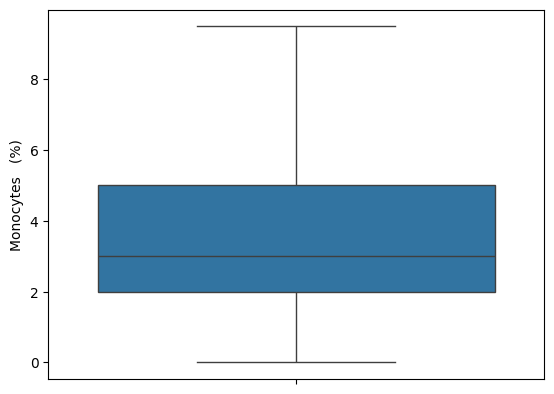

In [208]:
sns.boxplot(df['Monocytes   (%)'])

<Axes: ylabel='Eosinophils   (%)'>

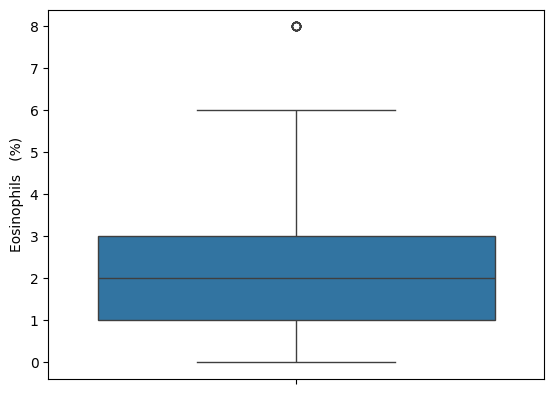

In [209]:
sns.boxplot(df['Eosinophils   (%)'])

In [210]:
q1 = df['Eosinophils   (%)'].quantile(0.25)
q3 = df['Eosinophils   (%)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Eosinophils   (%)'] = np.where(df['Eosinophils   (%)'] > upper_limit , upper_limit ,
                         np.where(df['Eosinophils   (%)'] < lower_limit , lower_limit , df['Eosinophils   (%)']))

<Axes: ylabel='Eosinophils   (%)'>

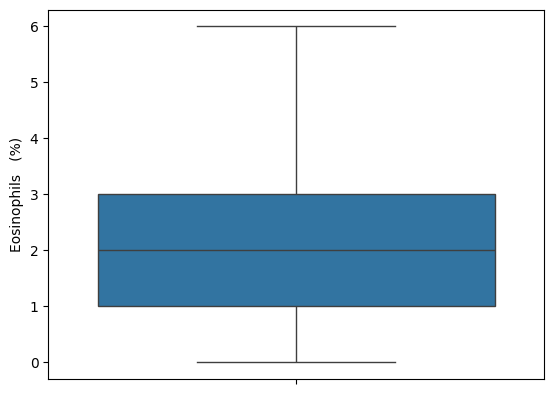

In [211]:
sns.boxplot(df['Eosinophils   (%)'])

<Axes: ylabel='Basophils  (%)'>

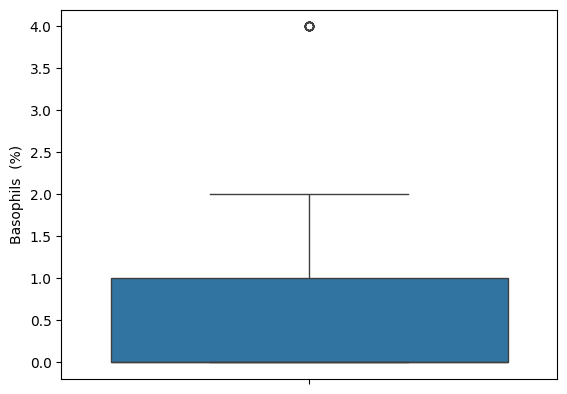

In [212]:
sns.boxplot(df['Basophils  (%)'])

In [213]:
q1 = df['Basophils  (%)'].quantile(0.25)
q3 = df['Basophils  (%)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Basophils  (%)'] = np.where(df['Basophils  (%)'] > upper_limit , upper_limit ,
                         np.where(df['Basophils  (%)'] < lower_limit , lower_limit , df['Basophils  (%)']))

<Axes: ylabel='Basophils  (%)'>

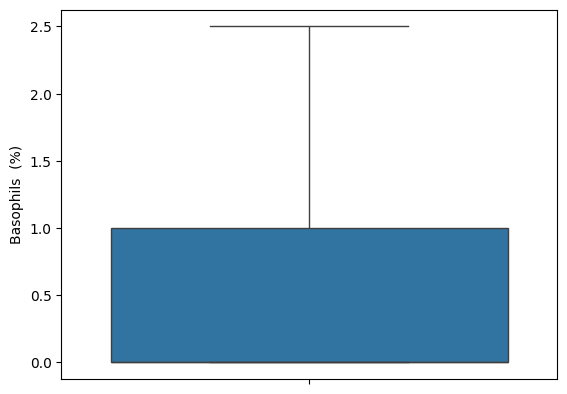

In [214]:
sns.boxplot(df['Basophils  (%)'])

<Axes: ylabel='Platelet Count  (lakhs/mm)'>

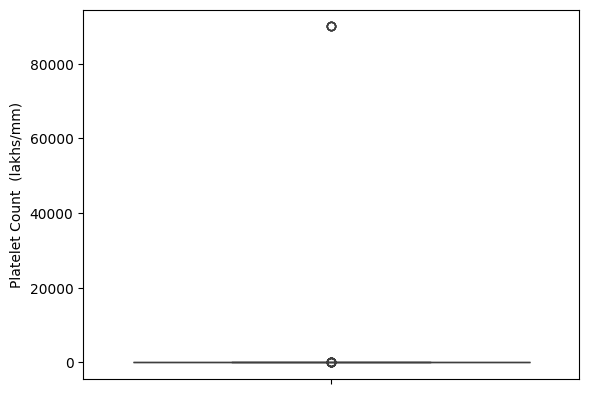

In [215]:
sns.boxplot(df['Platelet Count  (lakhs/mm)'])

In [216]:
# This code calculates the interquartile range (IQR) for the 'Platelet Count (lakhs/mm)' column to determine the upper and lower limits for detecting outliers, then caps the values in 'Platelet Count (lakhs/mm)' to these limits, replacing any values above the upper limit with the upper limit and any values below the lower limit with the lower limit.

q1 = df['Platelet Count  (lakhs/mm)'].quantile(0.25)
q3 = df['Platelet Count  (lakhs/mm)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Platelet Count  (lakhs/mm)'] = np.where(df['Platelet Count  (lakhs/mm)'] > upper_limit , upper_limit ,
                         np.where(df['Platelet Count  (lakhs/mm)'] < lower_limit , lower_limit , df['Platelet Count  (lakhs/mm)']))

<Axes: ylabel='Platelet Count  (lakhs/mm)'>

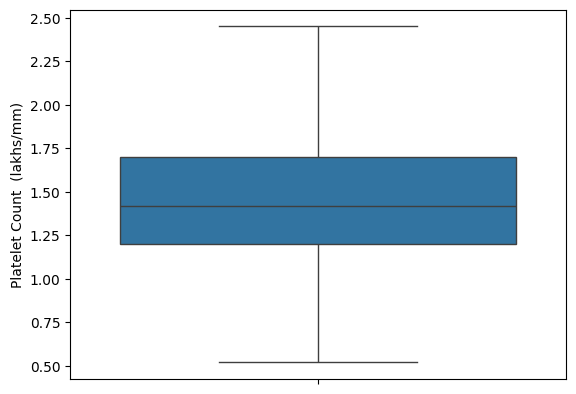

In [217]:
sns.boxplot(df['Platelet Count  (lakhs/mm)'])

<Axes: ylabel='Direct    (mg/dl)'>

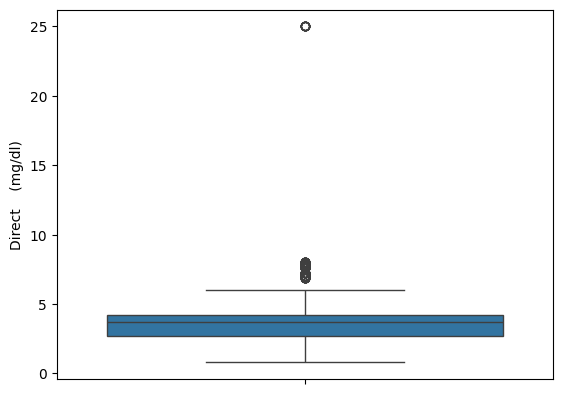

In [218]:
sns.boxplot(df['Direct    (mg/dl)'])

In [219]:
q1 = df['Direct    (mg/dl)'].quantile(0.25)
q3 = df['Direct    (mg/dl)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Direct    (mg/dl)'] = np.where(df['Direct    (mg/dl)'] > upper_limit , upper_limit ,
                         np.where(df['Direct    (mg/dl)'] < lower_limit , lower_limit , df['Direct    (mg/dl)']))

<Axes: ylabel='Direct    (mg/dl)'>

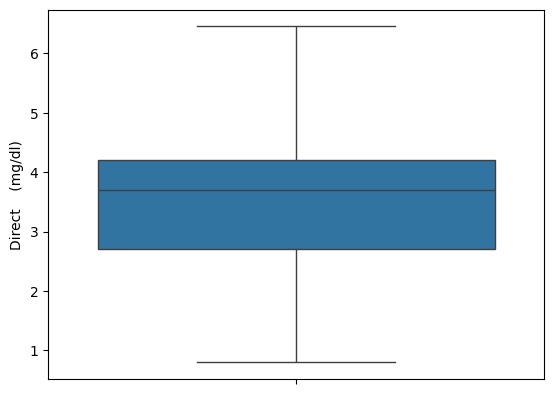

In [220]:
sns.boxplot(df['Direct    (mg/dl)'])

<Axes: ylabel='Indirect     (mg/dl)'>

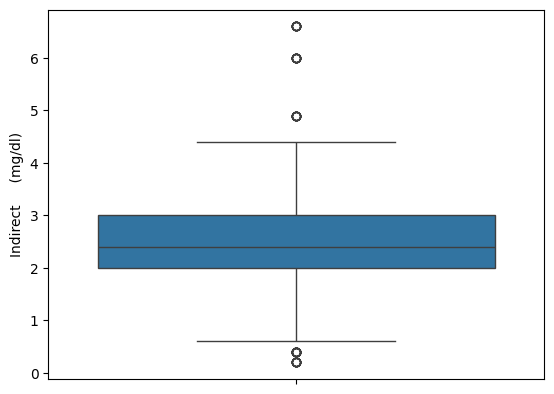

In [221]:
sns.boxplot(df['Indirect     (mg/dl)'])

In [222]:
q1 = df['Indirect     (mg/dl)'].quantile(0.25)
q3 = df['Indirect     (mg/dl)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Indirect     (mg/dl)'] = np.where(df['Indirect     (mg/dl)'] > upper_limit , upper_limit ,
                         np.where(df['Indirect     (mg/dl)'] < lower_limit , lower_limit , df['Indirect     (mg/dl)']))

<Axes: ylabel='Indirect     (mg/dl)'>

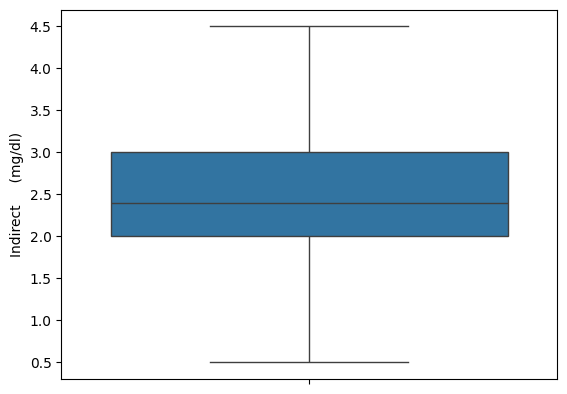

In [223]:
sns.boxplot(df['Indirect     (mg/dl)'])

<Axes: ylabel='Total Protein     (g/dl)'>

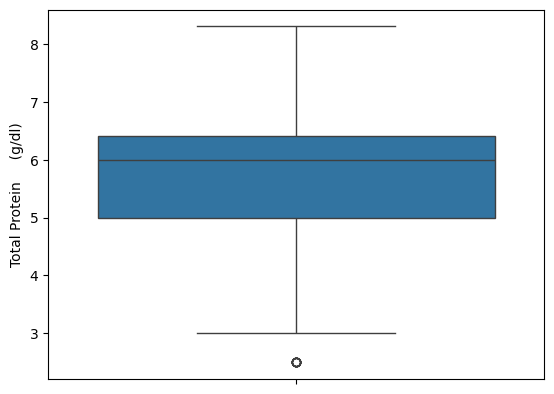

In [224]:
sns.boxplot(df['Total Protein     (g/dl)'])

In [225]:
q1 = df['Total Protein     (g/dl)'].quantile(0.25)
q3 = df['Total Protein     (g/dl)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Total Protein     (g/dl)'] = np.where(df['Total Protein     (g/dl)'] > upper_limit , upper_limit ,
                         np.where(df['Total Protein     (g/dl)'] < lower_limit , lower_limit , df['Total Protein     (g/dl)']))

<Axes: ylabel='Albumin   (g/dl)'>

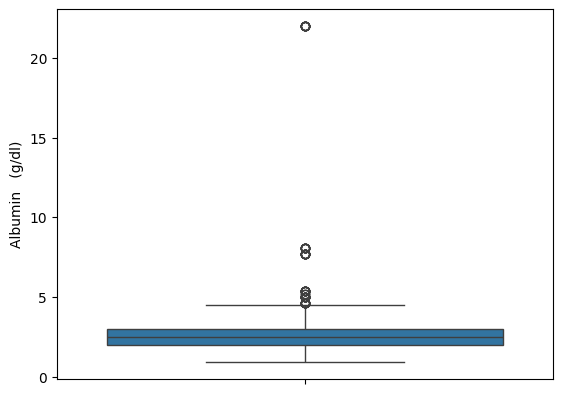

In [226]:
sns.boxplot(df['Albumin   (g/dl)'])

In [227]:
q1 = df['Albumin   (g/dl)'].quantile(0.25)
q3 = df['Albumin   (g/dl)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Albumin   (g/dl)'] = np.where(df['Albumin   (g/dl)'] > upper_limit , upper_limit ,
                         np.where(df['Albumin   (g/dl)'] < lower_limit , lower_limit , df['Albumin   (g/dl)']))

<Axes: ylabel='Globulin  (g/dl)'>

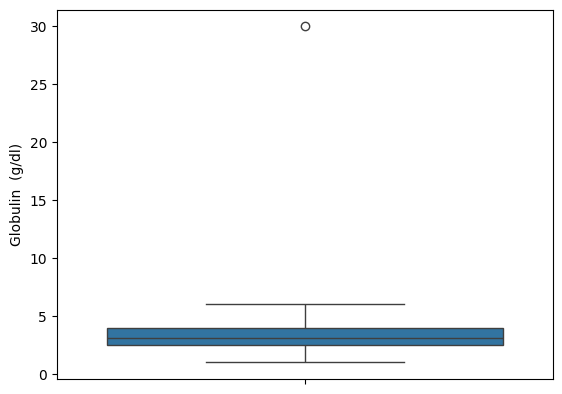

In [228]:
sns.boxplot(df['Globulin  (g/dl)'])

In [229]:
q1 = df['Globulin  (g/dl)'].quantile(0.25)
q3 = df['Globulin  (g/dl)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['Globulin  (g/dl)'] = np.where(df['Globulin  (g/dl)'] > upper_limit , upper_limit ,
                         np.where(df['Globulin  (g/dl)'] < lower_limit , lower_limit , df['Globulin  (g/dl)']))

<Axes: ylabel='SGOT/AST      (U/L)'>

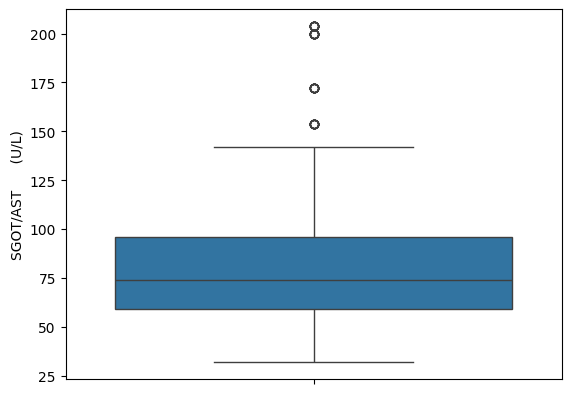

In [230]:
sns.boxplot(df['SGOT/AST      (U/L)'])

In [231]:
q1 = df['SGOT/AST      (U/L)'].quantile(0.25)
q3 = df['SGOT/AST      (U/L)'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit
df['SGOT/AST      (U/L)'] = np.where(df['SGOT/AST      (U/L)'] > upper_limit , upper_limit ,
                         np.where(df['SGOT/AST      (U/L)'] < lower_limit , lower_limit , df['SGOT/AST      (U/L)']))

**SCALING & TRANSFORMING THE DATA**




In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [233]:
for column in df.columns:
    # Check if the column has categorical data
    if df[column].dtype == 'object':
        # Perform label encoding
        df[column] = le.fit_transform(df[column])

In [234]:
df.drop(['Hepatitis B infection','LDL','TG','HDL'],axis=1,inplace=True)

In [235]:
df.drop(['Hepatitis C infection','TCH'],axis=1,inplace=True)

# ENCODING
SPLITTING THE DATASET FOR TEST & VALIDATION

In [236]:
df.columns

Index(['Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)',
       'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)',
       'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)',
       'Basophils  (%)', 'Platelet Count  (lakhs/mm)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)',
       'USG Abdomen (diffuse liver or  not)', 'Outcome'],
      dtype='object')

In [237]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('Diabetes Result', axis=1)
y = df['Diabetes Result']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can check the shape of X_train, X_test, y_train, y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (759, 31)
X_test shape: (190, 31)
y_train shape: (759,)
y_test shape: (190,)


In [238]:
X_train

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Blood pressure (mmhg),Obesity,Family history of cirrhosis/ hereditary,Hemoglobin (g/dl),...,Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),USG Abdomen (diffuse liver or not),Outcome
936,72.0,0,2,4.0,3.0,2,16,0,1,12.30,...,2.40,1.00,2.0,5.300000,4.2,3.5,110.0,110.0,1,1
290,52.0,1,2,12.0,1.0,3,23,0,1,10.20,...,1.80,4.00,3.0,6.000000,3.0,4.0,110.0,58.0,0,0
544,38.0,1,2,24.0,3.0,1,13,0,1,8.00,...,2.00,2.00,1.0,4.000000,2.0,2.0,100.0,94.0,0,0
275,60.0,0,1,10.0,3.0,1,33,1,1,10.50,...,1.34,6.45,1.8,6.400000,2.9,3.7,144.0,54.0,0,0
109,50.0,1,1,15.0,1.0,3,17,1,1,9.90,...,1.55,6.00,2.0,7.000000,3.0,4.0,120.0,79.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,54.0,1,1,20.0,2.0,3,24,1,1,9.00,...,1.60,6.45,3.9,5.000000,2.0,3.0,110.0,86.0,0,0
270,60.0,0,1,10.0,3.0,1,33,1,1,9.70,...,1.34,6.45,1.8,6.400000,2.9,3.7,144.0,54.0,0,0
861,57.0,1,1,25.0,3.0,1,5,1,1,8.30,...,1.20,3.70,2.9,5.590326,2.0,4.5,157.0,88.0,0,0
435,55.0,0,1,20.0,2.0,3,42,1,2,9.29,...,2.20,2.50,1.5,5.000000,2.5,2.5,152.0,151.5,0,0


In [239]:
pd.DataFrame(y_train).value_counts()

,count
Diabetes Result,
1,525
0,234


#    Balancing

In [240]:
from imblearn.over_sampling import SMOTE

In [241]:
# It balances the class distribution in the training data using SMOTE.

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)   #y_train.ravel()

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

Before OverSampling, counts of label '1': 525
Before OverSampling, counts of label '2': 0 

After OverSampling, the shape of train_X: (1050, 31)
After OverSampling, the shape of train_y: (1050,) 

After OverSampling, counts of label '1': 525
After OverSampling, counts of label '2': 0


# Model building

NAIVE BAYES

In [242]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [243]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', nb.score(X_train, y_train))
print('Initial Test score:', nb.score(X_test, y_test))

# No hyperparameters to tune for GaussianNB, directly fitting and scoring

# Make predictions on the test data
y_pred_nb = nb.predict(X_test)

# Compute confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):\n", conf_matrix_nb)

# Compute classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):\n", class_report_nb)

# Compute and print accuracy and other metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy on test set: {nb_accuracy}')

Initial Train score: 0.8353096179183136
Initial Test score: 0.7789473684210526
Confusion Matrix (Naive Bayes):
 [[49 19]
 [23 99]]
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        68
           1       0.84      0.81      0.82       122

    accuracy                           0.78       190
   macro avg       0.76      0.77      0.76       190
weighted avg       0.78      0.78      0.78       190

Accuracy on test set: 0.7789473684210526


RANDOM FOREST

In [244]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the RandomForestClassifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', rf.score(X_train, y_train))
print('Initial Test score:', rf.score(X_test, y_test))

# Hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=5, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Get the best parameters
rf_best_params = random_search_rf.best_params_

# Make predictions on the test data with the tuned model
y_pred = random_search_rf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):\n", conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):\n", class_report)

# Compute and print accuracy and other metrics
rf_accuracy = accuracy_score(y_test, y_pred)

print(f'Optimal hyperparameters for Random Forest: {rf_best_params}')
print(f'Accuracy on test set: {rf_accuracy}')


Initial Train score: 0.9934123847167325
Initial Test score: 0.8473684210526315
Confusion Matrix (Random Forest):
 [[ 51  17]
 [  8 114]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        68
           1       0.87      0.93      0.90       122

    accuracy                           0.87       190
   macro avg       0.87      0.84      0.85       190
weighted avg       0.87      0.87      0.87       190

Optimal hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Accuracy on test set: 0.868421052631579


LOGISTIC REGRESSION CV

In [245]:
from sklearn.linear_model import LogisticRegressionCV

# Create and train the Logistic Regression CV model
lcv = LogisticRegressionCV(cv=5)
lcv.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', lcv.score(X_train, y_train))
print('Initial Test score:', lcv.score(X_test, y_test))

# Logistic Regression CV automatically handles hyperparameter tuning with cross-validation

# Make predictions on the test data with the tuned model
y_pred_lcv = lcv.predict(X_test)

# Compute confusion matrix
conf_matrix_lcv = confusion_matrix(y_test, y_pred_lcv)
print("Confusion Matrix (Logistic Regression CV):\n", conf_matrix_lcv)

# Compute classification report
class_report_lcv = classification_report(y_test, y_pred_lcv)
print("Classification Report (Logistic Regression CV):\n", class_report_lcv)

# Compute and print accuracy and other metrics
lcv_accuracy = accuracy_score(y_test, y_pred_lcv)
print(f'Accuracy on test set: {lcv_accuracy}')

Initial Train score: 0.8801054018445322
Initial Test score: 0.8263157894736842
Confusion Matrix (Logistic Regression CV):
 [[ 43  25]
 [  8 114]]
Classification Report (Logistic Regression CV):
               precision    recall  f1-score   support

           0       0.84      0.63      0.72        68
           1       0.82      0.93      0.87       122

    accuracy                           0.83       190
   macro avg       0.83      0.78      0.80       190
weighted avg       0.83      0.83      0.82       190

Accuracy on test set: 0.8263157894736842


RIDGE CLASSIFIER

In [246]:
from sklearn.linear_model import RidgeClassifier

# Create and train the Ridge Classifier model
rg = RidgeClassifier()
rg.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', rg.score(X_train, y_train))
print('Initial Test score:', rg.score(X_test, y_test))

# Hyperparameter grid for tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV for hyperparameter tuning
grid_search_rg = GridSearchCV(rg, param_grid, cv=5, n_jobs=-1)
grid_search_rg.fit(X_train, y_train)

# Get the best parameters
rg_best_params = grid_search_rg.best_params_

# Make predictions on the test data with the tuned model
y_pred_rg = grid_search_rg.predict(X_test)

# Compute confusion matrix
conf_matrix_rg = confusion_matrix(y_test, y_pred_rg)
print("Confusion Matrix (Ridge Classifier):\n", conf_matrix_rg)

# Compute classification report
class_report_rg = classification_report(y_test, y_pred_rg)
print("Classification Report (Ridge Classifier):\n", class_report_rg)

# Compute and print accuracy and other metrics
rg_accuracy = accuracy_score(y_test, y_pred_rg)

print(f'Optimal hyperparameters for Ridge Classifier: {rg_best_params}')
print(f'Accuracy on test set: {rg_accuracy}')

Initial Train score: 0.8866930171277997
Initial Test score: 0.8421052631578947
Confusion Matrix (Ridge Classifier):
 [[ 44  24]
 [ 10 112]]
Classification Report (Ridge Classifier):
               precision    recall  f1-score   support

           0       0.81      0.65      0.72        68
           1       0.82      0.92      0.87       122

    accuracy                           0.82       190
   macro avg       0.82      0.78      0.79       190
weighted avg       0.82      0.82      0.82       190

Optimal hyperparameters for Ridge Classifier: {'alpha': 100}
Accuracy on test set: 0.8210526315789474


SUPPORT VECTOR CLASSIFIER [ SVC ]

In [247]:
from sklearn.svm import SVC

# Create and train the Support Vector Classifier model
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc.predict(X_test)

# Compute and print accuracy
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy on test set: {svc_accuracy:.2f}')

# Print initial training and test scores
print('Initial Train score:', svc.score(X_train, y_train))
print('Initial Test score:', svc.score(X_test, y_test))

# Compute confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix (Support Vector Classifier):\n", conf_matrix_svc)

# Compute classification report
class_report_svc = classification_report(y_test, y_pred_svc)
print("Classification Report (Support Vector Classifier):\n", class_report_svc)

Accuracy on test set: 0.64
Initial Train score: 0.7127799736495388
Initial Test score: 0.6421052631578947
Confusion Matrix (Support Vector Classifier):
 [[  6  62]
 [  6 116]]
Classification Report (Support Vector Classifier):
               precision    recall  f1-score   support

           0       0.50      0.09      0.15        68
           1       0.65      0.95      0.77       122

    accuracy                           0.64       190
   macro avg       0.58      0.52      0.46       190
weighted avg       0.60      0.64      0.55       190



LOGISTIC REGRESSION

In [248]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
log = LogisticRegression()
log.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', log.score(X_train, y_train))
print('Initial Test score:', log.score(X_test, y_test))

# Hyperparameter grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}

# GridSearchCV for hyperparameter tuning
grid_search_log = GridSearchCV(log, param_grid, cv=5, n_jobs=-1)
grid_search_log.fit(X_train, y_train)

# Get the best parameters
log_best_params = grid_search_log.best_params_

# Make predictions on the test data with the tuned model
y_pred_log = grid_search_log.predict(X_test)

# Compute confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log)

# Compute classification report
class_report_log = classification_report(y_test, y_pred_log)
print("Classification Report (Logistic Regression):\n", class_report_log)

# Compute and print accuracy and other metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f'Optimal hyperparameters for Logistic Regression: {log_best_params}')
print(f'Accuracy on test set: {log_accuracy}')

Initial Train score: 0.8445322793148881
Initial Test score: 0.7842105263157895
Confusion Matrix (Logistic Regression):
 [[ 42  26]
 [ 11 111]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.79      0.62      0.69        68
           1       0.81      0.91      0.86       122

    accuracy                           0.81       190
   macro avg       0.80      0.76      0.78       190
weighted avg       0.80      0.81      0.80       190

Optimal hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Accuracy on test set: 0.8052631578947368


XGBOOST

In [249]:
from xgboost import XGBClassifier

# Create and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', model.score(X_train, y_train))
print('Initial Test score:', model.score(X_test, y_test))

# Make predictions on the test data
y_pred_xgb = model.predict(X_test)

# Compute and print accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy on test set: {xgb_accuracy:.2f}')

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):\n", conf_matrix_xgb)

# Compute classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report (XGBoost):\n", class_report_xgb)

Initial Train score: 0.9920948616600791
Initial Test score: 0.8421052631578947
Accuracy on test set: 0.84
Confusion Matrix (XGBoost):
 [[ 48  20]
 [ 10 112]]
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.83      0.71      0.76        68
           1       0.85      0.92      0.88       122

    accuracy                           0.84       190
   macro avg       0.84      0.81      0.82       190
weighted avg       0.84      0.84      0.84       190



KNN

In [250]:
from sklearn.neighbors import KNeighborsClassifier


# Create and train the KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# HYPERPARAMETER TUNING

k = np.random.randint(1, 50, 60)
params = {'n_neighbors': k}

random_search = RandomizedSearchCV(knn, params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search.fit(X_train, y_train)

# Get the best parameters
knn_best_params = random_search.best_params_

# Print training and test scores with tuned model
print('Train score with tuned model:', random_search.score(X_train, y_train))
print('Test score with tuned model:', random_search.score(X_test, y_test))

# Print optimal hyperparameters
print(f'Optimal hyperparameters for KNN: {knn_best_params}')

# Make predictions on the test data with the tuned model
y_pred_knn = random_search.predict(X_test)

# Compute and print accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy on test set: {knn_accuracy:.2f}')

# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):\n", conf_matrix_knn)

# Compute classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report (KNN):\n", class_report_knn)

Train score with tuned model: 0.9130434782608695
Test score with tuned model: 0.8736842105263158
Optimal hyperparameters for KNN: {'n_neighbors': np.int64(7)}
Accuracy on test set: 0.87
Confusion Matrix (KNN):
 [[ 51  17]
 [  7 115]]
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        68
           1       0.87      0.94      0.91       122

    accuracy                           0.87       190
   macro avg       0.88      0.85      0.86       190
weighted avg       0.87      0.87      0.87       190



In [251]:
from sklearn.preprocessing import StandardScaler

# Define your model list with trained models
model_list = {
    'logistic regression': log,
    'logistic regression CV': lcv,
    'naive bayes': nb,
    'XGBoost': model,
    'Ridge classifier': rg,
    'Random Forest': rf,
    'Support Vector Classifier': svc,
    'KNN': knn  # Assuming knn is your trained KNN model
}

# Function to evaluate each model
def eval(name, model, X_train, X_test, y_test):
    # Check if model has been fitted
    if hasattr(model, "predict"):
        if name in ['naive bayes', 'XGBoost', 'Random Forest', 'Support Vector Classifier']:
            # For models that require normalization
            scaler = StandardScaler()
            scaler.fit(X_train)
            X_test_normalized = scaler.transform(X_test)
            y_pred = model.predict(X_test_normalized)
        else:
            # For models that do not need normalization (e.g., KNN)
            y_pred = model.predict(X_test)

        result = [
            name,
            "{:.2f}".format(accuracy_score(y_test, y_pred) * 100),
            "{:.2f}".format(f1_score(y_test, y_pred) * 100),
            "{:.2f}".format(recall_score(y_test, y_pred) * 100),
            "{:.2f}".format(precision_score(y_test, y_pred) * 100)
        ]
    else:
        # Handle case where the model has not been fitted
        result = [name, "Model not fitted"] * 4

    return result

# Evaluate each model and store results
model_eval_info = []
for name, model in model_list.items():
    model_eval_info.append(eval(name, model, X_train, X_test, y_test))

# Convert results to a DataFrame and save to CSV
model_eval_info_df = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
model_eval_info_df.to_csv('model_eval.csv', index=False)

print(model_eval_info_df)


                        Name Accuracy F1 Score Precision  Recall
0        logistic regression    78.42    84.53     91.80   78.32
1     logistic regression CV    82.63    87.36     93.44   82.01
2                naive bayes    35.79     0.00      0.00    0.00
3                    XGBoost    35.79     6.15      3.28   50.00
4           Ridge classifier    84.21    88.37     93.44   83.82
5              Random Forest    38.95     9.38      4.92  100.00
6  Support Vector Classifier    35.79     0.00      0.00    0.00
7                        KNN    86.32    89.84     94.26   85.82


# saving model using pickle

In [252]:
import pickle

In [253]:
filename = 'liver_prediction.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [254]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 949
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             949 non-null    float64
 1   Gender                                          949 non-null    int64  
 2   Place(location where the patient lives)         949 non-null    int64  
 3   Duration of alcohol consumption(years)          949 non-null    float64
 4   Quantity of alcohol consumption (quarters/day)  949 non-null    float64
 5   Type of alcohol consumed                        949 non-null    int64  
 6   Blood pressure (mmhg)                           949 non-null    int64  
 7   Obesity                                         949 non-null    int64  
 8   Family history of cirrhosis/ hereditary         949 non-null    int64  
 9   Hemoglobin  (g/dl)                              

# Model Testing

In [255]:
Diabetes_Results = ['Yes','No']

In [256]:
pred_value = knn.predict([[12.2,13,14,111,3456,245,367,1,9,87,65,34,69,23,55.55,667.67,135,1,4,6,89.876,22,45,60.06,43.356,23.21,8,90.9,73,34,31]])
prediction = int(pred_value[0])

In [257]:
prediction = Diabetes_Results[prediction]

In [258]:
prediction

'Yes'

In [259]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Diabetes Result,Blood pressure (mmhg),Obesity,Family history of cirrhosis/ hereditary,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),USG Abdomen (diffuse liver or not),Outcome
0,55.0,1,1,12.0,2.0,2,1,32,1,1,12.0,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
1,55.0,1,1,12.0,2.0,2,1,32,1,1,9.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
2,55.0,1,1,12.0,2.0,2,1,32,0,1,10.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
3,55.0,1,1,12.0,2.0,2,0,32,0,1,7.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
4,55.0,0,1,12.0,2.0,2,1,32,0,1,10.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0


In [260]:
# Save the cleaned and processed DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)
df.head()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Diabetes Result,Blood pressure (mmhg),Obesity,Family history of cirrhosis/ hereditary,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),USG Abdomen (diffuse liver or not),Outcome
0,55.0,1,1,12.0,2.0,2,1,32,1,1,12.0,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
1,55.0,1,1,12.0,2.0,2,1,32,1,1,9.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
2,55.0,1,1,12.0,2.0,2,1,32,0,1,10.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
3,55.0,1,1,12.0,2.0,2,0,32,0,1,7.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
4,55.0,0,1,12.0,2.0,2,1,32,0,1,10.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56.0,0,0
